# Exploratory Data Analysis - A. Rüdiger

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/rudiger-clean.csv')
df

,match,competition,date,position,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
0,Manchester City - Real Madrid 4:0,Europe. UEFA Champions League,5/17/23,LCB,30,16,15,94,0,0,...,0,0,0,1,0,0,0,2,1,50
1,Real Madrid - Manchester City 1:1,Europe. UEFA Champions League,5/9/23,RCB,96,60,40,67,0,0,...,3,2,67,2,11,6,55,6,0,0
2,Chelsea - Real Madrid 0:2,Europe. UEFA Champions League,4/18/23,LCB,48,32,25,78,0,0,...,3,3,100,1,2,2,100,2,0,0
3,Real Madrid - Chelsea 2:0,Europe. UEFA Champions League,4/12/23,LCB,24,11,6,55,0,0,...,0,0,0,2,3,2,67,2,0,0
4,Real Madrid - Liverpool 1:0,Europe. UEFA Champions League,3/15/23,LCB,96,50,38,76,0,0,...,1,1,100,5,6,5,83,5,1,20
5,Liverpool - Real Madrid 2:5,Europe. UEFA Champions League,2/21/23,LCB,96,60,50,83,0,0,...,2,0,0,5,4,3,75,10,1,10
6,RB Leipzig - Real Madrid 3:2,Europe. UEFA Champions League,10/25/22,"LB, LCB",94,71,60,85,0,0,...,2,1,50,1,4,0,0,10,2,20
7,Shakhtar Donetsk - Real Madrid 1:1,Europe. UEFA Champions League,10/11/22,RCB,101,84,66,79,1,0,...,6,4,67,10,6,1,17,14,6,43
8,Real Madrid - RB Leipzig 2:0,Europe. UEFA Champions League,9/14/22,RCB,94,71,64,90,0,0,...,2,2,100,2,3,3,100,9,0,0
9,Celtic - Real Madrid 0:3,Europe. UEFA Champions League,9/6/22,RCB,47,50,45,90,0,0,...,1,0,0,1,2,1,50,0,0,0


In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     26 non-null     object 
 1    competition              26 non-null     object 
 2   date                      26 non-null     object 
 3   position                  26 non-null     object 
 4   minutes_played            26 non-null     int64  
 5   total_actions             26 non-null     int64  
 6   total_actions_successful  26 non-null     int64  
 7   TAS_percent               26 non-null     int64  
 8   goals                     26 non-null     int64  
 9   assists                   26 non-null     int64  
 10  shots                     26 non-null     int64  
 11  shots_on_target           26 non-null     int64  
 12  SOT_percent               26 non-null     int64  
 13  xG                        26 non-null     float64
 14  passes      

In [ ]:
# Row & Columns 
print(df.shape)

(26, 39)


In [ ]:
df.isnull().sum()

match                       0
 competition                0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
df.describe()

,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,shots,shots_on_target,SOT_percent,xG,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,88.307692,75.423077,59.846154,78.692308,0.076923,0.076923,0.807692,0.153846,9.923077,0.051538,...,3.423077,2.076923,53.192308,3.346154,6.615385,2.807692,42.769231,7.730769,1.653846,21.076923
std,23.502799,31.435233,26.149864,9.027820,0.271746,0.271746,1.059027,0.367946,27.679484,0.105250,...,2.548303,2.076980,36.157455,2.606796,4.271552,2.280688,29.256531,4.565590,1.671940,19.328576
min,24.000000,11.000000,6.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,59.250000,42.750000,72.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,33.000000,1.000000,3.000000,1.000000,25.500000,3.500000,0.250000,1.500000
50%,95.500000,72.000000,62.000000,77.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,3.000000,2.000000,58.500000,2.000000,6.000000,3.000000,39.000000,7.000000,1.000000,17.500000
75%,97.000000,92.750000,77.000000,86.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.037500,...,5.000000,3.000000,80.250000,5.000000,9.000000,3.000000,64.000000,10.000000,2.750000,40.500000
max,128.000000,140.000000,104.000000,94.000000,1.000000,1.000000,4.000000,1.000000,100.000000,0.410000,...,11.000000,9.000000,100.000000,10.000000,18.000000,9.000000,100.000000,17.000000,6.000000,57.000000


## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

LCB3         14
LCB           5
RCB           4
LCB, LCB3     2
LB, LCB       1
Name: position, dtype: int64
LCB3    14
LCB      5
RCB      4
Name: position, dtype: int64
7.666666666666667


- LCB3: This term could potentially denote "Left Centre Back 3", implying a specific role within a three-man central defense on the left side. Alongside traditional defensive duties such as intercepting and clearing the ball, Rüdiger might also be required to contribute to ball distribution, launching counter-attacks, and providing a wide passing option. Key performance indicators for this role could include successful tackles, interceptions, clearances, accurate long balls, and successful passes into the final third.

- LCB: This acronym stands for "Left Centre Back". In this position, Rüdiger operates primarily on the left side of a central defensive pair. His tasks include intercepting opposition attacks, winning aerial duels, marking opponents, and clearing the danger from the defensive zone. Additionally, modern center backs like Rüdiger also play a role in initiating attacks with accurate distribution. Important performance metrics here would include successful tackles, interceptions, clearances, aerial duels won, and passing accuracy.

- RCB: "RCB" stands for "Right Centre Back". In this role, Rüdiger would carry out similar duties to those of an LCB, but on the right side of the defense. Key metrics remain the same, but one might also pay attention to his ability to coordinate with the right-back, and his proficiency in distributing the ball to the right side of the field.

These positions require different aspects of Rüdiger's defensive and distributive skills, leading to variations in his statistical output. By examining these variations, you can gain a detailed understanding of his performances, his adaptability to various tactical setups, and his contributions to the team. This data-driven approach is fundamental in contemporary football, aiding teams in optimizing their strategies and individual player performances.

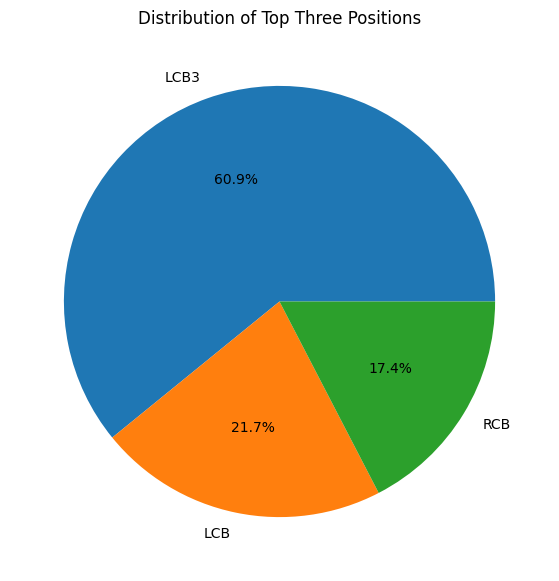

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

## Average Minutes Played

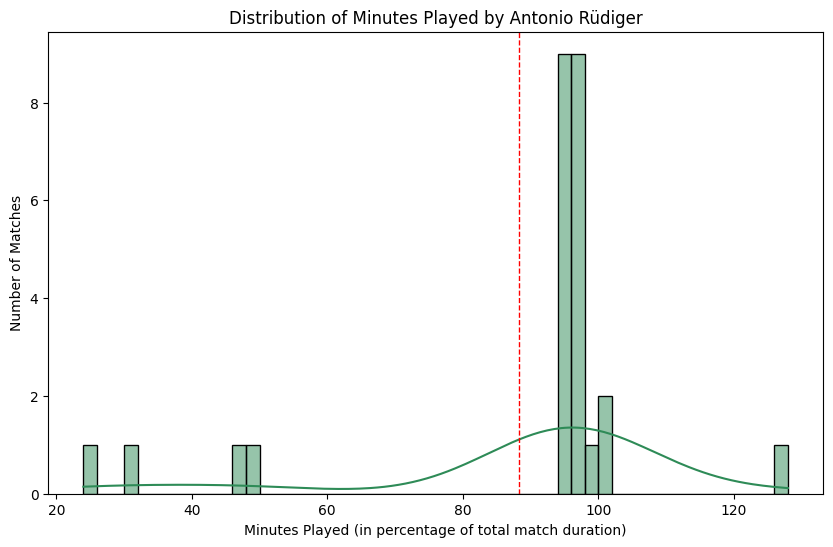

Antonio Rüdiger played on average 88.3076923076923 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='seagreen')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Antonio Rüdiger')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Antonio Rüdiger played on average {average_minutes_played} minutes per match.")

## Interceptions

Antonio Rüdiger has an average of 3.3461538461538463 interceptions per match.
The minimum interceptions in a match by Antonio Rüdiger is 1.
The maximum interceptions in a match by Antonio Rüdiger is 10.


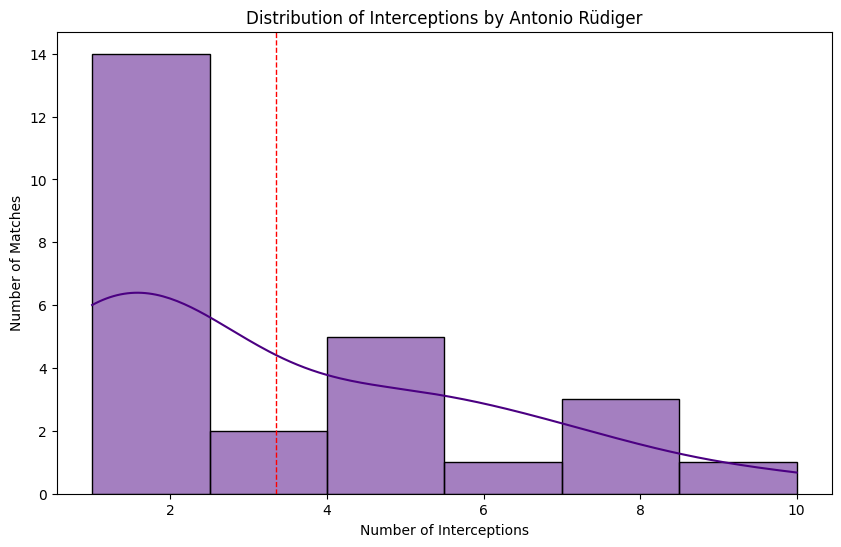

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Antonio Rüdiger has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Antonio Rüdiger is {min_interceptions}.")
print(f"The maximum interceptions in a match by Antonio Rüdiger is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='indigo')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Antonio Rüdiger')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'duels_won', 'aerial_duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -0.5858204709713943
Kurtosis of passes_accurate: -0.8781347362494332
Kurtosis of long_passes_accurate: -0.7641664824379188
Kurtosis of duels_won: 1.361294691671561
Kurtosis of aerial_duels_won: 2.7952731068923358
Kurtosis of interceptions: -0.15812791144019345
Kurtosis of losses_own_half: 0.5441153352664707
Kurtosis of recoveries_opp_half: 0.22970423345345292


- Duels won (Kurtosis: 1.36): The positive kurtosis indicates that Rüdiger's performance in winning duels is characterized by occasional extreme performances where he wins significantly more duels than average. This might suggest that in some games, his defensive skills shine more than others, leading to significantly high duel wins.

- Aerial duels won (Kurtosis: 2.79): Similar to duels won, the high kurtosis indicates a number of games where Rüdiger has exceptional performance in aerial duels. These might be games against teams with a more direct, long-ball style of play, which would necessitate more aerial duels.

- Losses_own_half (Kurtosis: 0.54): The positive kurtosis here suggests that Rüdiger occasionally has games where he loses possession in his own half more than usual. These could be games where he's under more pressure or facing high-pressing teams.

- Recoveries_opp_half (Kurtosis: 0.23): This positive kurtosis could suggest that Rüdiger has occasional games where he recovers the ball in the opposition half more than usual. This could be during games where Chelsea is dominating and playing in the opposition half.

- Total actions successful (Kurtosis: -0.58): A negative kurtosis for total successful actions suggests that Rüdiger has a consistently good performance level. There are fewer games where he has exceptionally high or low numbers of successful actions.

- Passes accurate (Kurtosis: -0.87): Similar to total actions successful, this suggests a consistently high level of accurate passes from Rüdiger with less variability from game to game.

- Long passes accurate (Kurtosis: -0.76): Rüdiger's long passing accuracy also exhibits less variability, with a consistency in his performances.

- Interceptions (Kurtosis: -0.15): The negative kurtosis indicates that the number of interceptions Rüdiger makes in games is quite consistent with fewer outliers.

In summary, Rüdiger seems to have consistency in his performance when it comes to successful actions, accurate passes, accurate long passes, and interceptions. However, his performance shows more variability in winning duels, winning aerial duels, losing possession in his own half, and recovering possession in the opposition half. These insights can be useful to assess Rüdiger's performance trends and variability over the games.

### Features Normalization

### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


Platykurtic variables normalized:
   total_actions_successful  passes_accurate  long_passes_accurate  \
0                 -1.748930        -1.629390             -1.578004   
1                 -0.773969        -0.813911             -1.117014   
2                 -1.358946        -1.303198              0.265956   
3                 -2.099916        -1.914807             -1.578004   
4                 -0.851966        -0.650815             -0.195034   

   interceptions  
0      -0.917838  
1      -0.526628  
2      -0.917838  
3      -0.526628  
4       0.647001  

Leptokurtic variables normalized:
   duels_won  aerial_duels_won  losses_own_half  recoveries_opp_half
0  -0.767302         -1.019776        -1.255452            -0.398815
1   0.194137         -0.037769         1.427432            -1.008767
2  -0.286583          0.453234        -0.361158            -1.008767
3  -1.248022         -1.019776        -0.361158            -1.008767
4  -1.007662         -0.528773         0.980285   

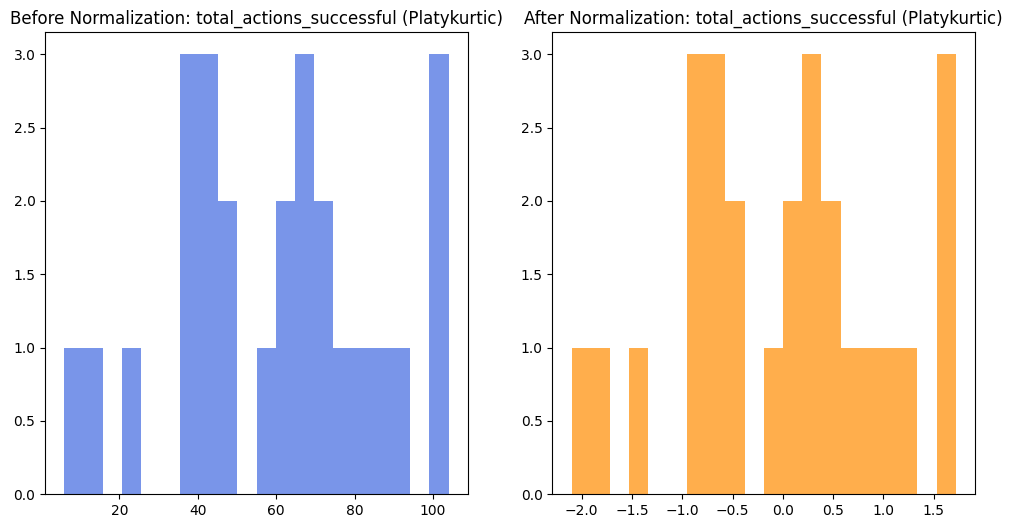

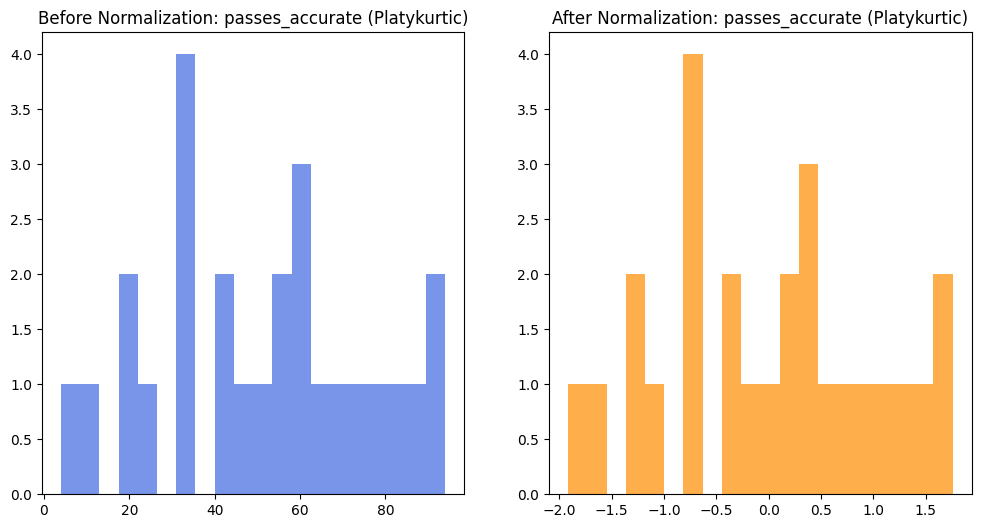

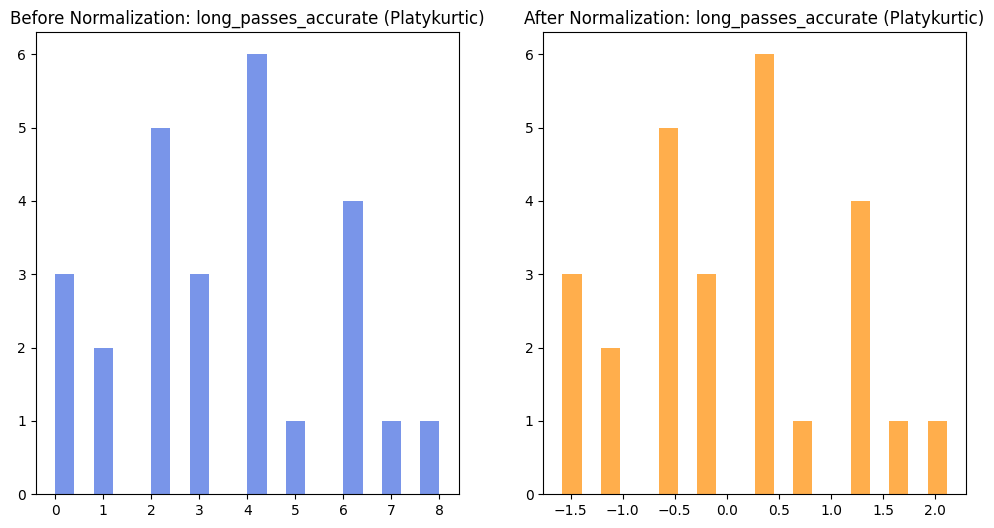

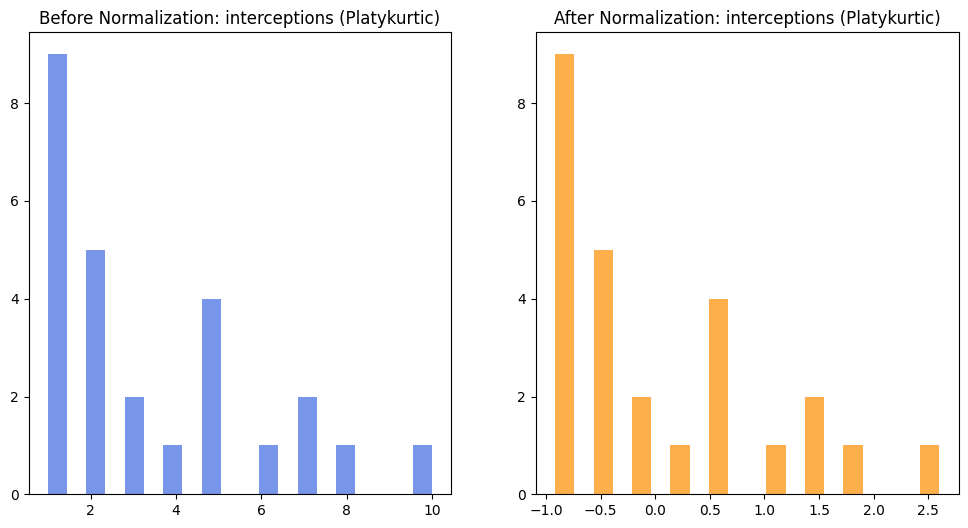

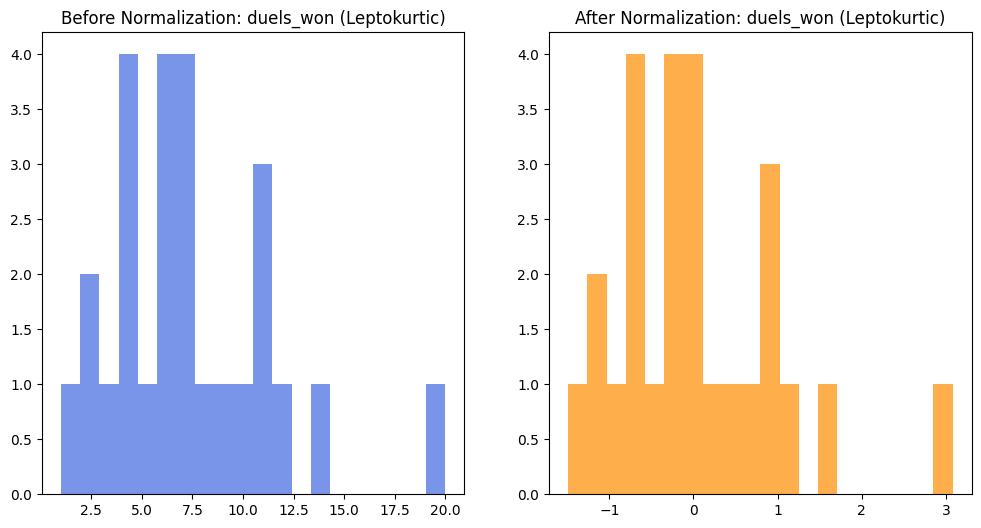

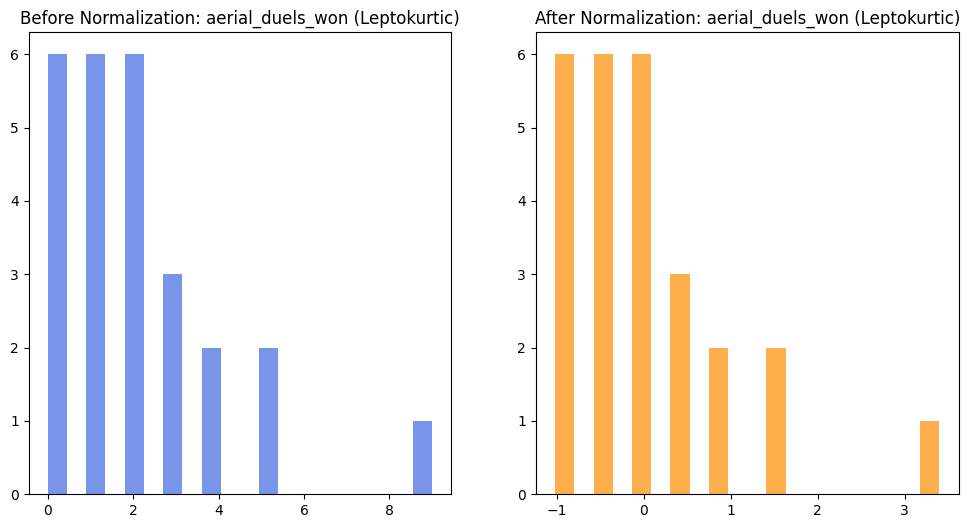

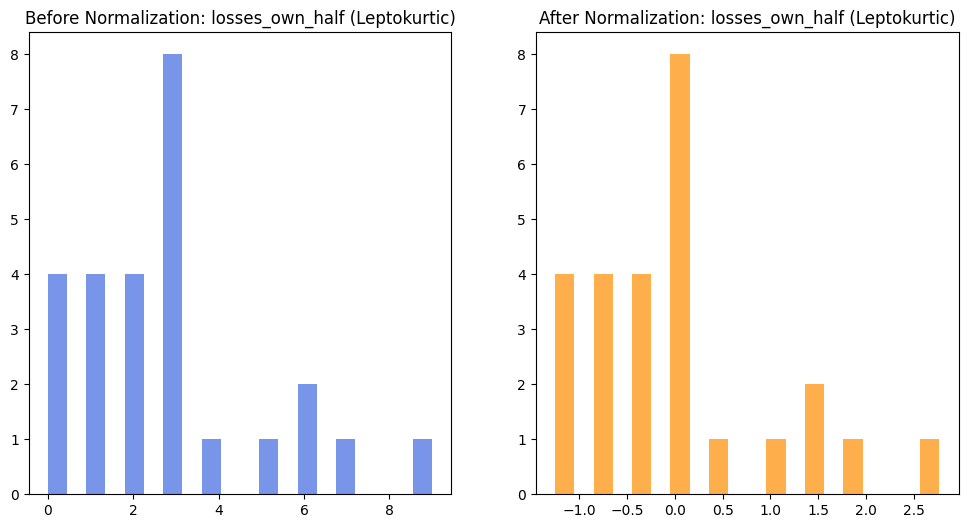

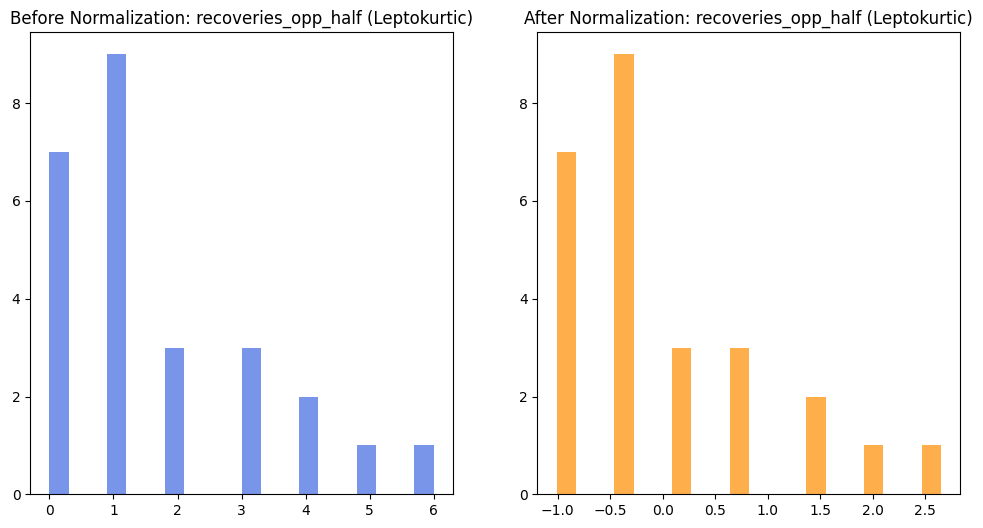

In [ ]:
from scipy.stats import sem
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'interceptions']]
leptokurtic_variables = df[['duels_won', 'aerial_duels_won', 'losses_own_half', 'recoveries_opp_half']]
# Antonio Rüdiger data does not have mesokurtic variables

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic and leptokurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())
print("\nLeptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

# Calculate and print the standard error of the mean for each type of variable
for kurtosis_type, variables in [("Platykurtic", platykurtic_variables_normalized), 
                                 ("Leptokurtic", leptokurtic_variables_normalized)]:
    print(f"\n{kurtosis_type} variables SEM:")
    for col in variables.columns:
        print(f"{col}: {sem(variables[col])}")

# Plot the before and after normalization distributions for each type of variables
variables = [("Platykurtic", platykurtic_variables, platykurtic_variables_normalized), 
             ("Leptokurtic", leptokurtic_variables, leptokurtic_variables_normalized)]

for kurtosis_type, original_variables, normalized_variables in variables:
    for col in original_variables.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(original_variables[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({kurtosis_type})')

        plt.subplot(1,2,2)
        plt.hist(normalized_variables[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({kurtosis_type})')

        plt.show()

## Sampling statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

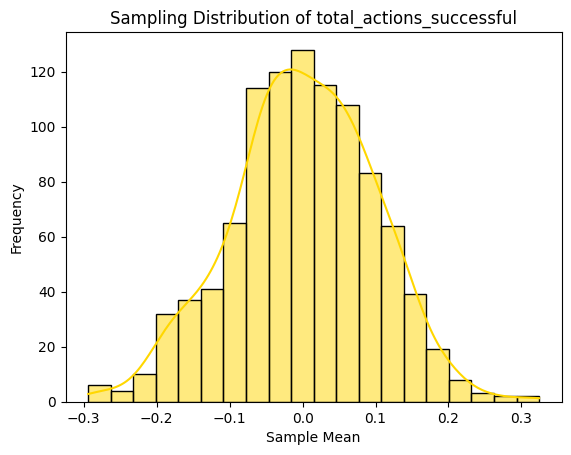

Sample Mean of total_actions_successful: 0.0007759189638621357
Sample Standard Deviation of total_actions_successful: 0.09846665081940997
Standard Error of total_actions_successful: 0.0031153469646737443


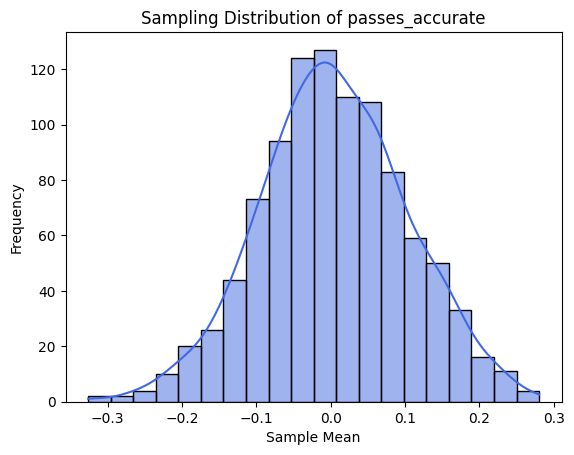

Sample Mean of passes_accurate: 0.0043612437401071725
Sample Standard Deviation of passes_accurate: 0.0989615897113223
Standard Error of passes_accurate: 0.0031310061382293264


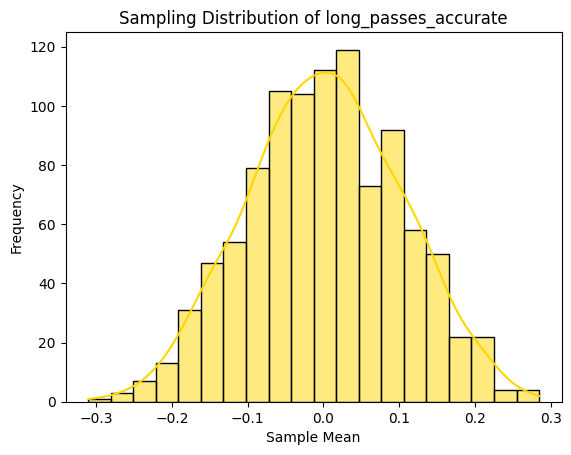

Sample Mean of long_passes_accurate: 0.001900697269432606
Sample Standard Deviation of long_passes_accurate: 0.10113721581351073
Standard Error of long_passes_accurate: 0.0031998399019179933


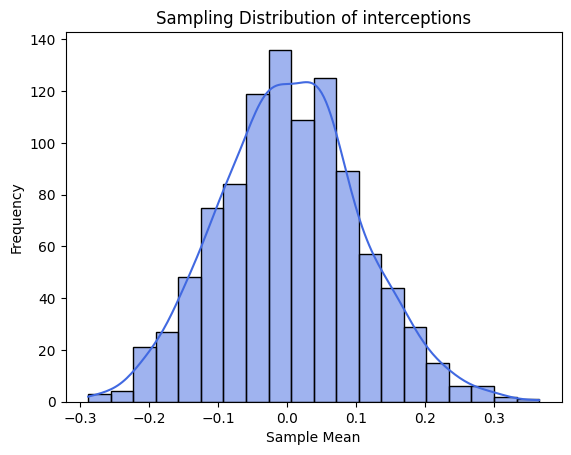

Sample Mean of interceptions: 0.004829935518323269
Sample Standard Deviation of interceptions: 0.10198316947090667
Standard Error of interceptions: 0.0032266046911831074


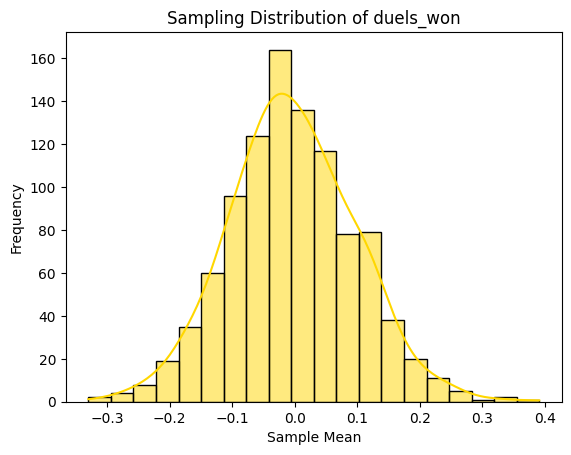

Sample Mean of duels_won: -0.0036481072918834855
Sample Standard Deviation of duels_won: 0.10138987303787471
Standard Error of duels_won: 0.003207833622740983


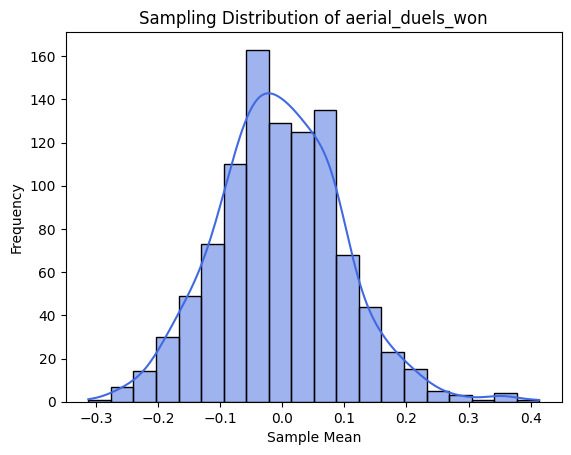

Sample Mean of aerial_duels_won: -0.004774062111475212
Sample Standard Deviation of aerial_duels_won: 0.10108152554951855
Standard Error of aerial_duels_won: 0.003198077939939535


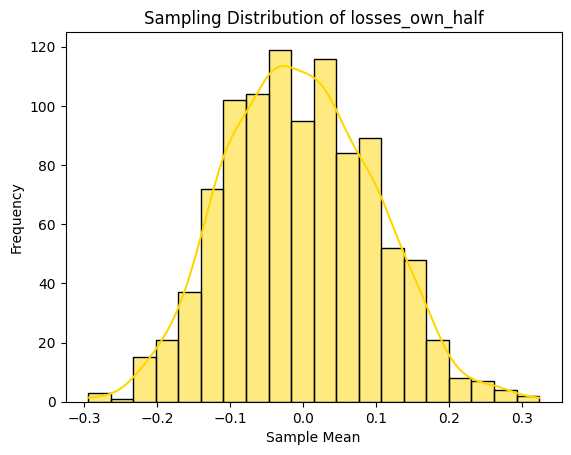

Sample Mean of losses_own_half: -0.003645283631437024
Sample Standard Deviation of losses_own_half: 0.10013706099363248
Standard Error of losses_own_half: 0.0031681964037753984


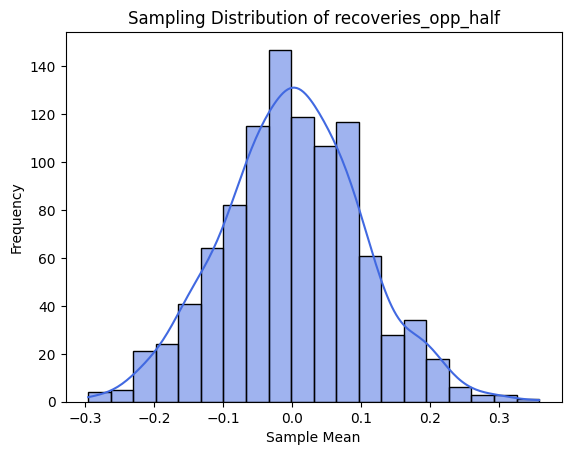

Sample Mean of recoveries_opp_half: 0.0010819615688849118
Sample Standard Deviation of recoveries_opp_half: 0.1007659235627722
Standard Error of recoveries_opp_half: 0.0031880927349663456


In [ ]:
# Define the features and the color for the plots
features = list(platykurtic_variables_normalized.columns) + \
            list(leptokurtic_variables_normalized.columns)
colors = ['gold', 'royalblue']

# Create a dictionary to map the types of kurtosis to the normalized variables
kurtosis_dict = {'Platykurtic': platykurtic_variables_normalized, 
                 'Leptokurtic': leptokurtic_variables_normalized}

for index, feature in enumerate(features):
    sample_means = []

    # Determine the kurtosis type of the feature
    for kurtosis_type, variables in kurtosis_dict.items():
        if feature in variables:
            kurtosis_variables_normalized = variables
            break

    # Draw samples and calculate the sample mean for each draw
    for _ in range(1000):
        sample = kurtosis_variables_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    # Plot the sampling distribution
    sns.histplot(sample_means, bins=20, color=colors[index%2], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

When we look at the mean of each feature, these values represent the average performance of Antonio Rüdiger in each of these areas. They are roughly centered around zero due to the data normalization process which scales all data to have a mean of zero and a standard deviation of one. This way, it becomes much easier to compare the different features on the same scale.

The standard deviation tells us about the variability of each feature. A lower standard deviation indicates that Rüdiger's performances in that area are more consistent, while a higher standard deviation suggests more variability.

Standard error, on the other hand, measures the precision of the sample mean as an estimate of the population mean. A smaller standard error means that we can have more confidence that the sample mean is close to the actual population mean.

- Total Actions Successful: The negative sample mean suggests that Rüdiger's overall performance is slightly below the average player in the sample. The relatively low standard deviation and standard error indicate that his performance in this aspect is quite consistent.

- Passes Accurate: The positive mean value indicates that Rüdiger's accuracy in passing is slightly better than the average player in the sample. The consistency in this area is indicated by the standard deviation and standard error, both relatively low.

- Long Passes Accurate: The positive sample mean indicates that Rüdiger's performance in making accurate long passes is slightly better than the average player in the sample. His consistency in this area is shown by the low standard deviation and standard error.

- Interceptions: With a positive mean value, Rüdiger's ability to intercept the ball is above the sample's average. His consistency in this area is demonstrated by the low standard deviation and standard error.

- Duels Won: The negative mean value suggests Rüdiger's performance in winning duels is slightly below the average player in the sample. However, he is fairly consistent in this area, as shown by the low standard deviation and standard error.

- Aerial Duels Won: Rüdiger's performance in winning aerial duels is slightly below average, as indicated by the negative mean. However, his performance in this aspect is quite consistent, as indicated by the low standard deviation and standard error.

- Losses Own Half: The negative mean value suggests that Rüdiger loses the ball in his own half less frequently than the average player in the sample, a good indication of defensive solidity. His consistency in this area is shown by the relatively low standard deviation and standard error.

- Recoveries Opp Half: The positive mean value indicates that Rüdiger is above average in recovering the ball in the opponent's half. His performance in this aspect is quite consistent, as indicated by the relatively low standard deviation and standard error.

Overall, these statistics show that Antonio Rüdiger is a consistent player who performs at or slightly above average in most areas, with particularly strong performance in accurate passes, long passes, interceptions, and recoveries in the opponent's half. His less strong areas include winning duels and aerial duels, though his performances in these aspects are still consistent.

## Central Limit Theorem

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

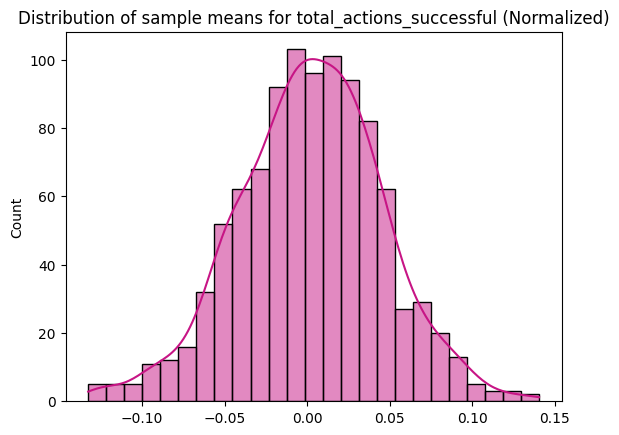

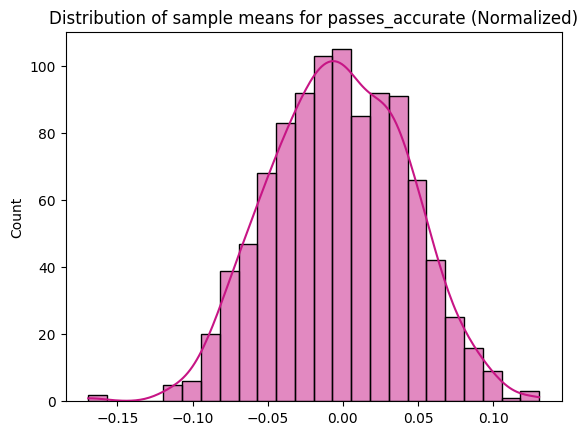

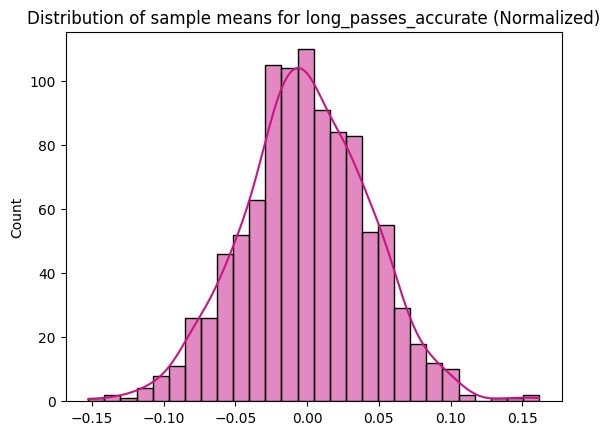

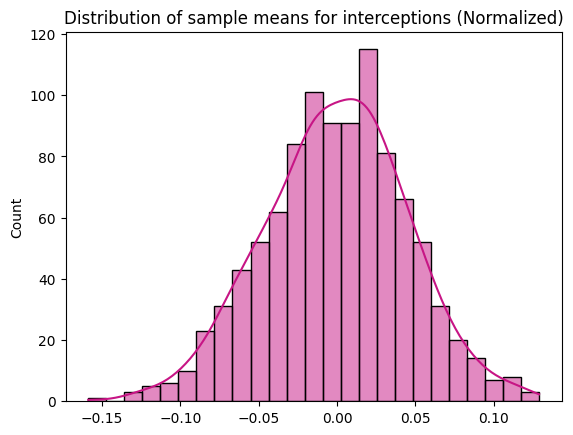

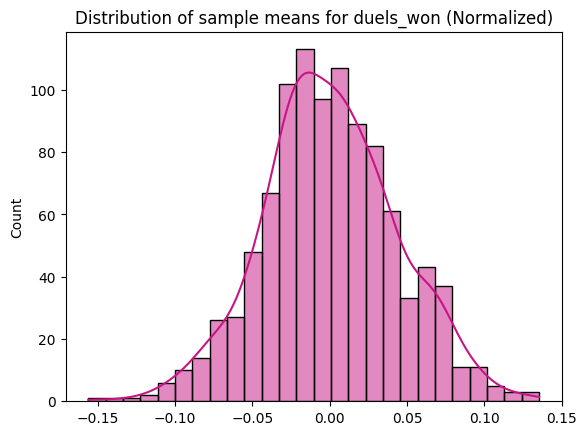

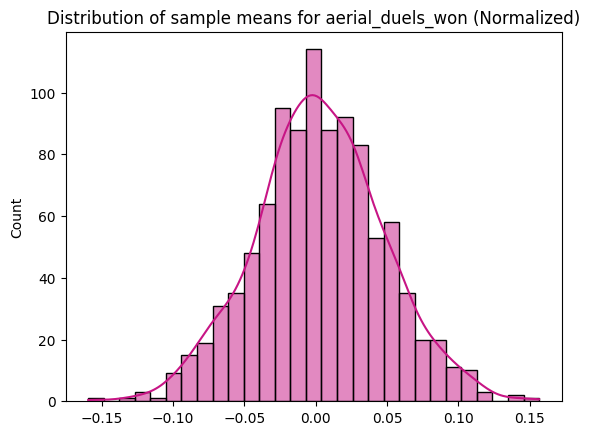

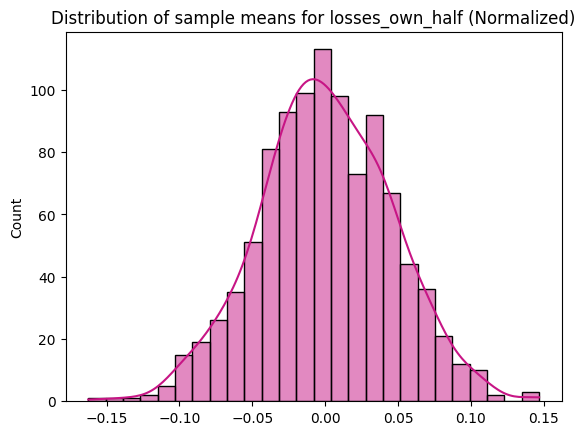

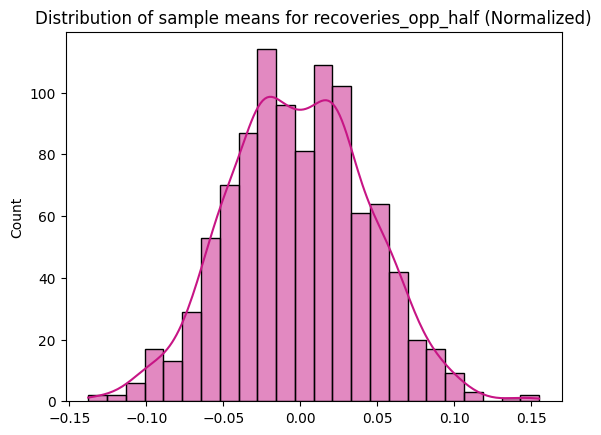

In [ ]:
# Combine all the normalized variables
normalized_df = pd.concat([platykurtic_variables_normalized, leptokurtic_variables_normalized], axis=1)

features = list(normalized_df.columns)
colors = ['mediumvioletred']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

In the case of Antonio Rüdiger's performance, applying the Central Limit Theorem helps us get a more "normalized" view of his performance across multiple games. As a result, we're able to make more robust statistical conclusions, making our results more reliable and less prone to the influence of outliers or skewness present in individual games. This can be crucial for understanding Rüdiger's average performance as well as assessing the stability and consistency of his performance over time.

## Features Correlation

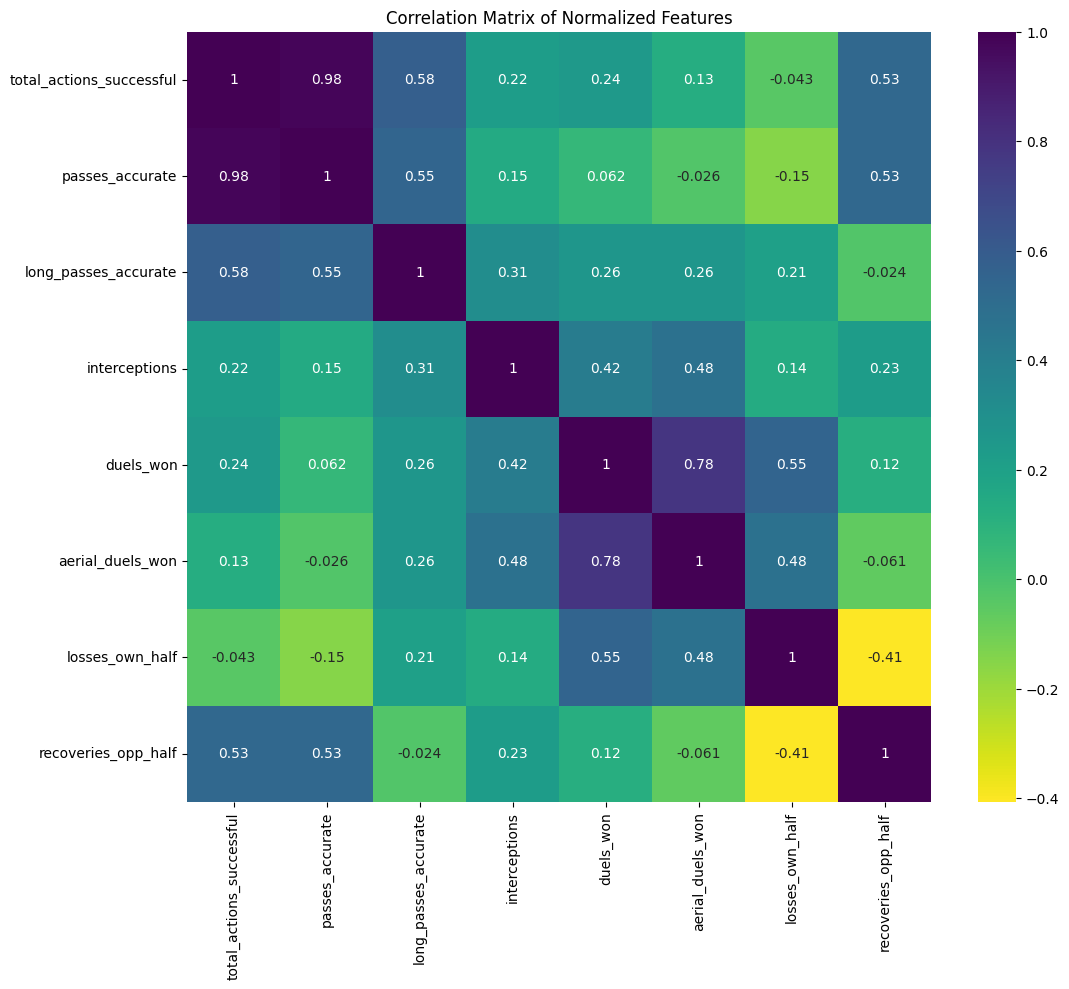

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### Based on Total Actions

Feature: passes_accurate
T-statistic: 7.191454432335878
P-value: 1.971732163131715e-07




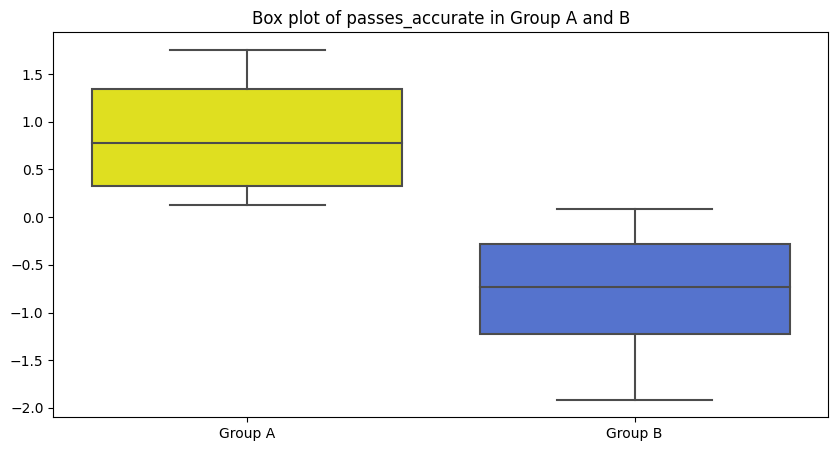

Feature: long_passes_accurate
T-statistic: 3.5345873647977837
P-value: 0.0016911462687084473




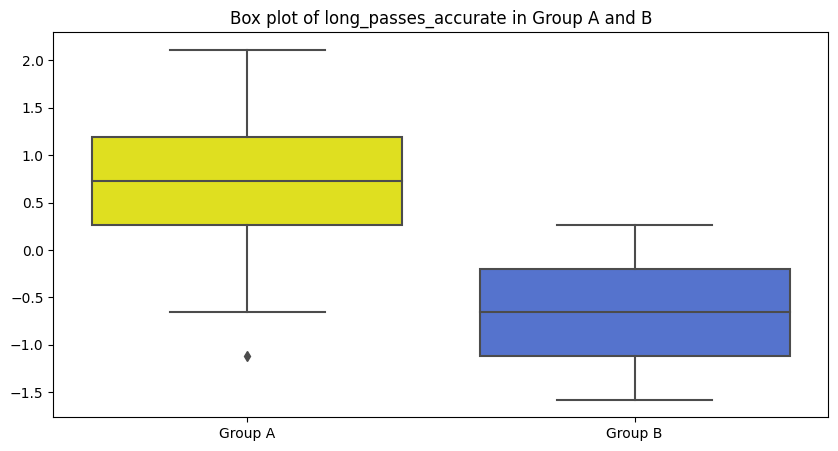

Feature: duels_won
T-statistic: 0.500776598966584
P-value: 0.6210901164929643




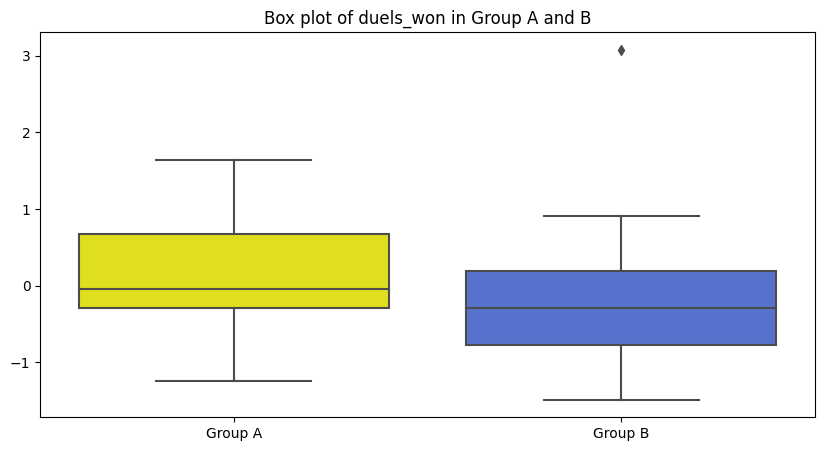

Feature: aerial_duels_won
T-statistic: 0.37112415986742586
P-value: 0.7138010307511826




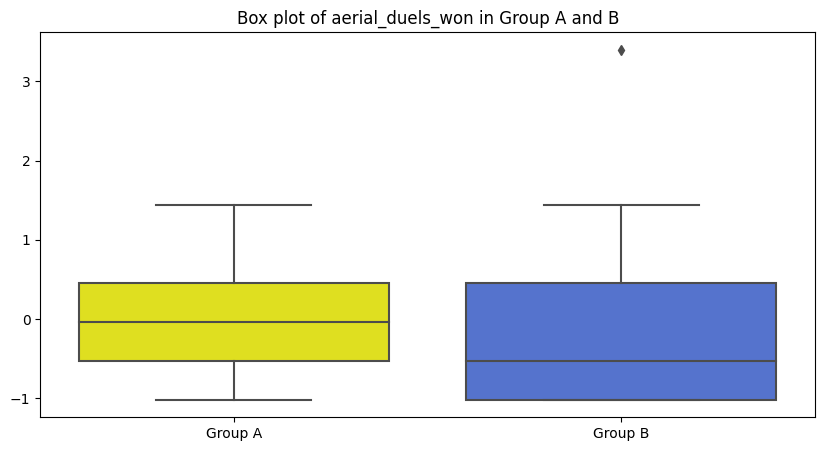

Feature: recoveries_opp_half
T-statistic: 2.7734203549257157
P-value: 0.01056039143153113




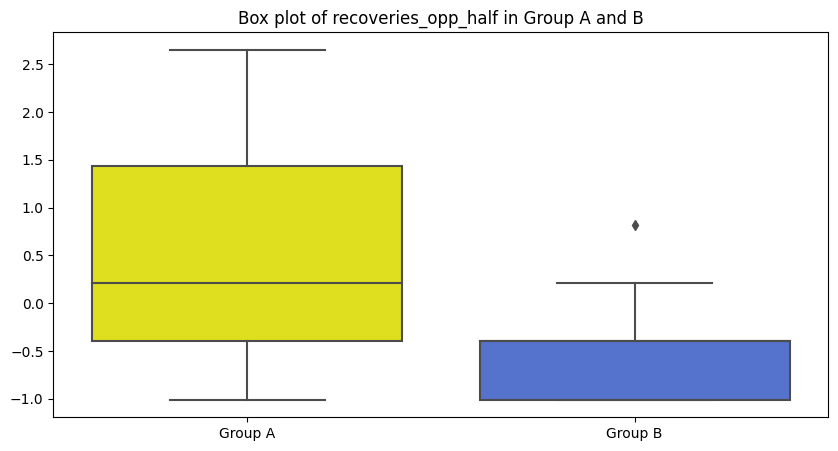

Feature: interceptions
T-statistic: 1.2962378478271397
P-value: 0.20722026580639366




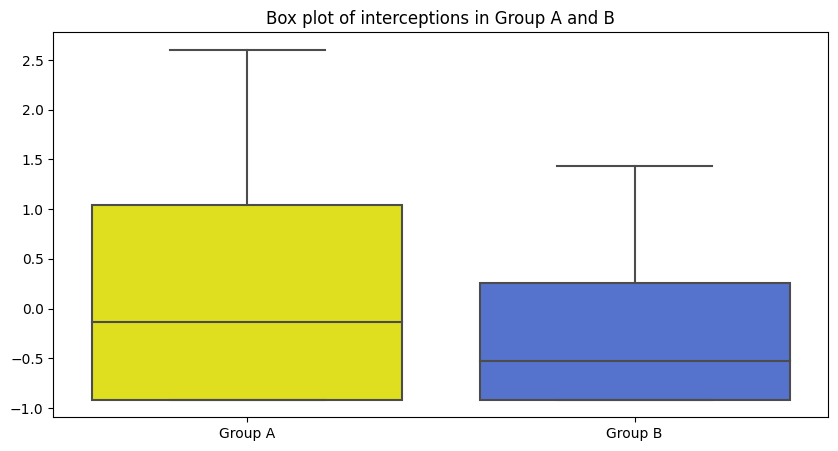



ANOVA Results
F-statistic: 1.31288695395427
P-value: 0.2682456378182993


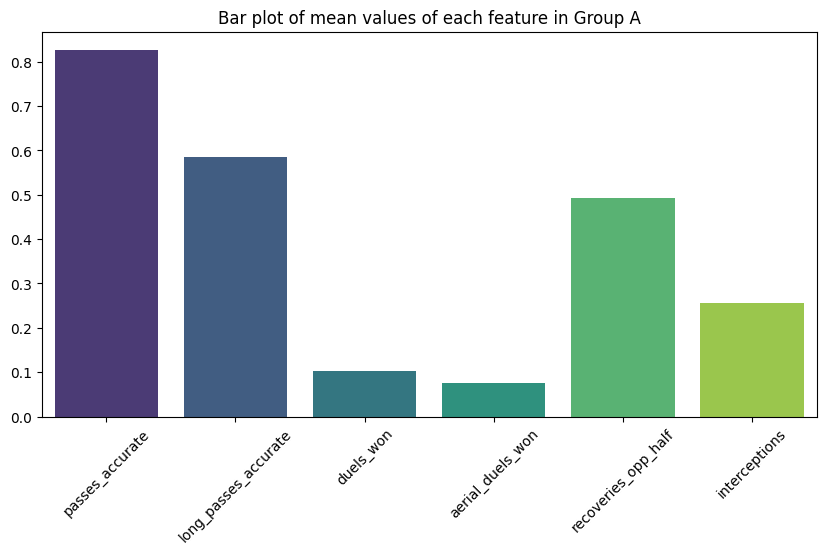

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['passes_accurate', 'long_passes_accurate', 
            'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

These results tell us about the statistical significance of the differences in means between two groups: one involving Antonio Rüdiger and the other not. The T-statistic quantifies the degree to which these groups differ in terms of the mean of each feature, while the P-value tells us the probability that we would see data as extreme as what we observed given that the null hypothesis is true (i.e., there is no difference between the groups).

In the case of Antonio Rüdiger, a low P-value (typically under 0.05) would indicate a statistically significant difference. When the P-value is high, it means the feature doesn't significantly differ when Rüdiger is playing compared to when he is not, suggesting that this aspect of performance isn't significantly impacted by his presence.

The ANOVA F-statistic and its associated P-value are a measure of whether there's a significant difference in variances across the different features analyzed, which can help us understand whether Rüdiger's overall influence on a match varies significantly across these different aspects of play.

- Passes Accurate: With a very low P-value, this indicates that Rüdiger's presence on the field has a statistically significant impact on the accuracy of passes. Simply put, when Rüdiger is playing, there is a noticeable improvement in the accuracy of passes, which is vital for maintaining possession and controlling the flow of the game.

- Long Passes Accurate: Similarly, the significant T-statistic and low P-value suggest that Rüdiger's presence significantly improves the accuracy of long passes. This capability is important for launching quick counter-attacks and shifting the play's focus rapidly.

- Duels Won: The high P-value indicates that there is no statistically significant difference in the number of duels won when Rüdiger is on the field. On the football pitch, this may mean that while Rüdiger contributes to duels, his presence doesn't necessarily tip the scales drastically in terms of duels won.

- Aerial Duels Won: Just like regular duels, the high P-value suggests that there isn't a statistically significant difference in aerial duels won when Rüdiger is playing. Despite this, his role in challenging for aerial duels could still be essential in certain game situations.

- Recoveries Opp Half: The low P-value for recoveries in the opponent's half signifies that Rüdiger's presence significantly influences the number of recoveries. It means that he is highly effective in regaining possession in the opponent's half, disrupting their play and potentially setting up counter-attacks.

- Interceptions: The high P-value for interceptions suggests that the number of interceptions does not significantly change with Rüdiger on the field. However, this doesn't diminish the importance of his role in disrupting the opponent's plays.

The ANOVA results with a high P-value suggests that Rüdiger's overall impact on the game doesn't vary significantly across different aspects. This implies a consistent performance level across different areas, which can be critical for a team's stability on the pitch.

### Based on Duels Won

Feature: long_passes_accurate
T-statistic: 1.3515890512519482
P-value: 0.18910954870890603




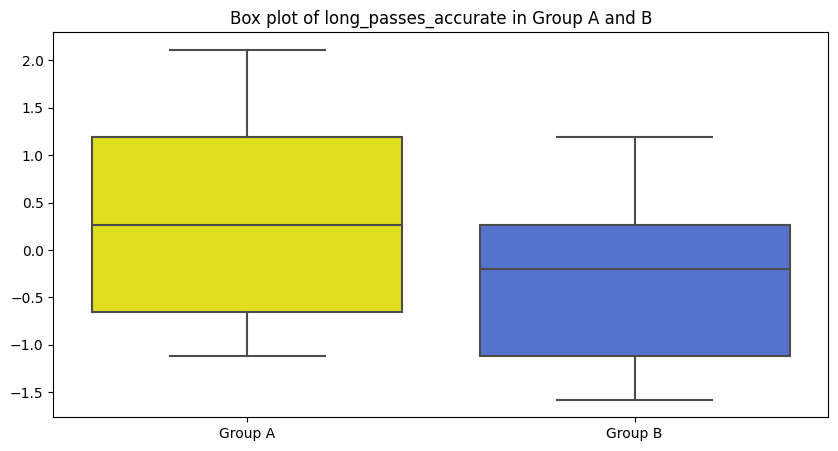

Feature: losses_own_half
T-statistic: 1.4977343821354936
P-value: 0.1472402086549878




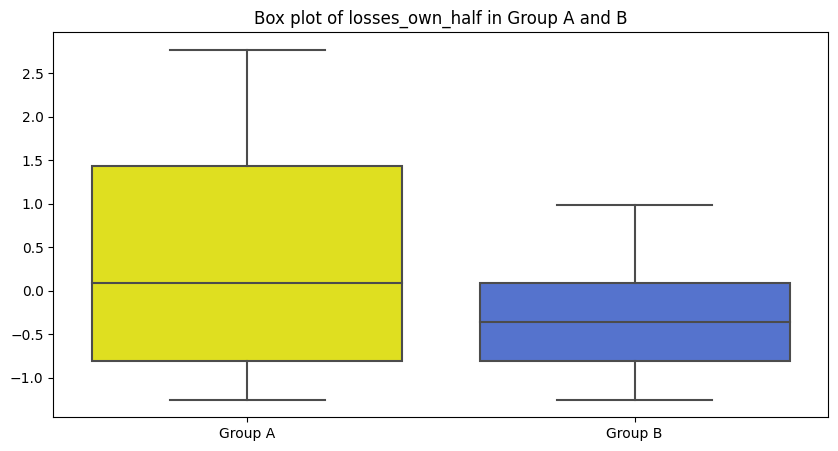

Feature: aerial_duels_won
T-statistic: 3.0520241619535904
P-value: 0.005482380475997352




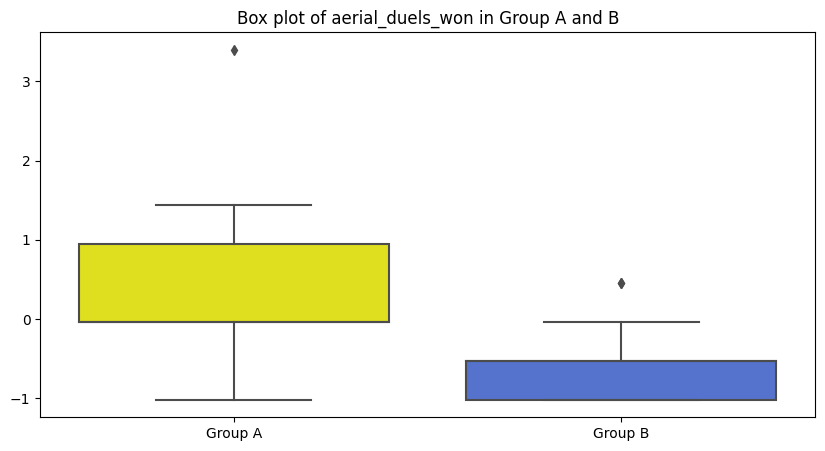

Feature: recoveries_opp_half
T-statistic: 0.8155724192496483
P-value: 0.4227653531334813




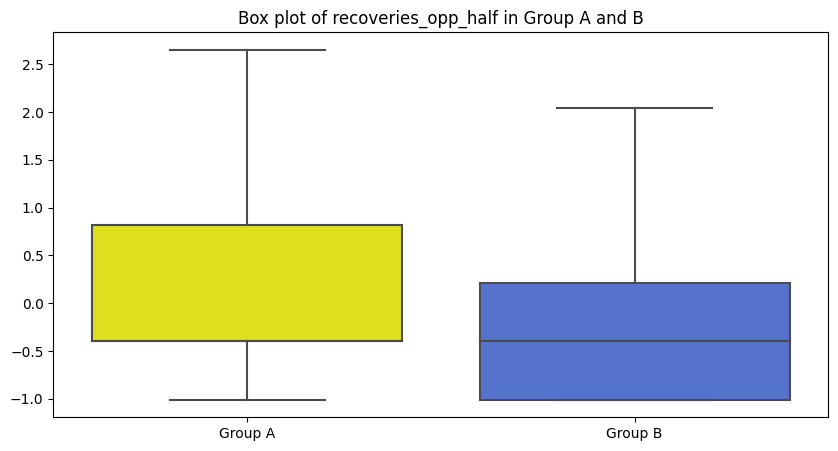

Feature: interceptions
T-statistic: 2.583333333333333
P-value: 0.016306619020697747




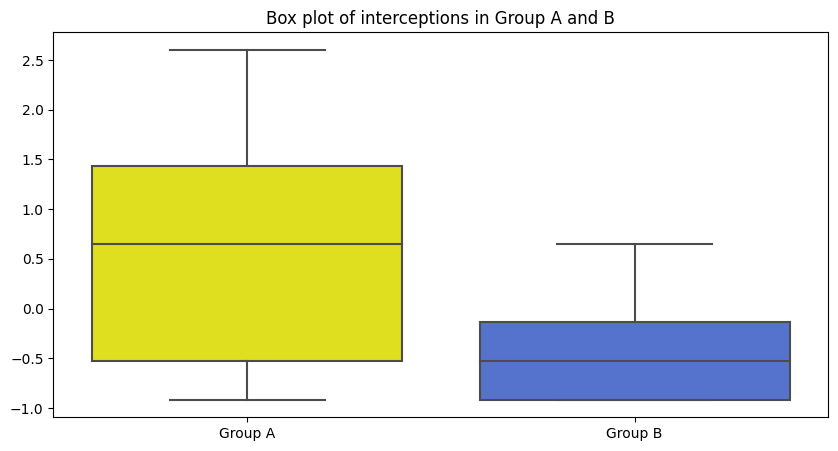



ANOVA Results
F-statistic: 0.23237775048581463
P-value: 0.9191038436900634


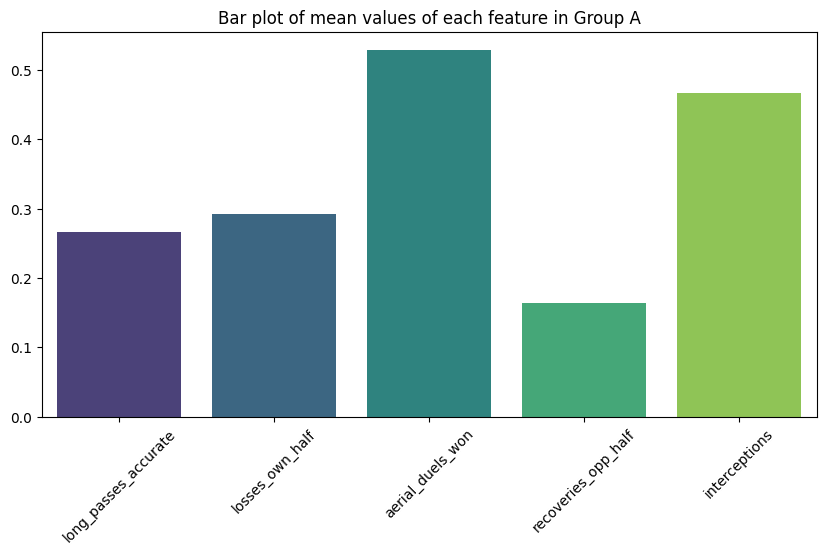

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['long_passes_accurate', 'losses_own_half', 'aerial_duels_won', 
            'recoveries_opp_half', 'interceptions']

# Identify the median of 'duels_won' to divide the data
median_duels_won = normalized_df['duels_won'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['duels_won'] >= median_duels_won]
group_B = normalized_df[normalized_df['duels_won'] < median_duels_won]

# Conduct t-tests (A/B tests) for each variable with 'duels_won'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'duels_won'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

### Based on Aerial Duels

Feature: long_passes_accurate
T-statistic: 1.6710154553293024
P-value: 0.10770961043662101




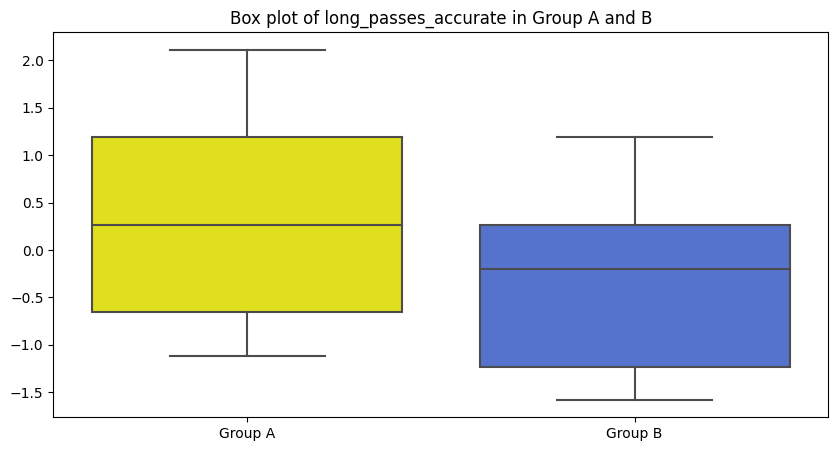

Feature: losses_own_half
T-statistic: 1.9441589431258757
P-value: 0.06368855896064336




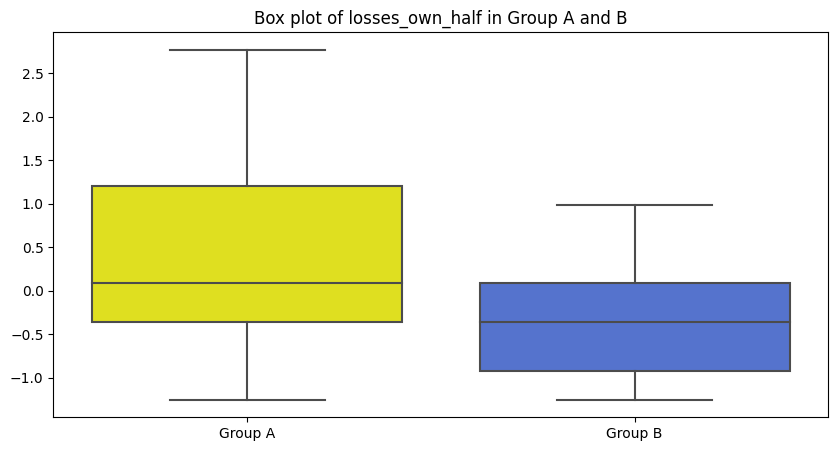

Feature: duels_won
T-statistic: 3.3288874574684404
P-value: 0.00280667064240975




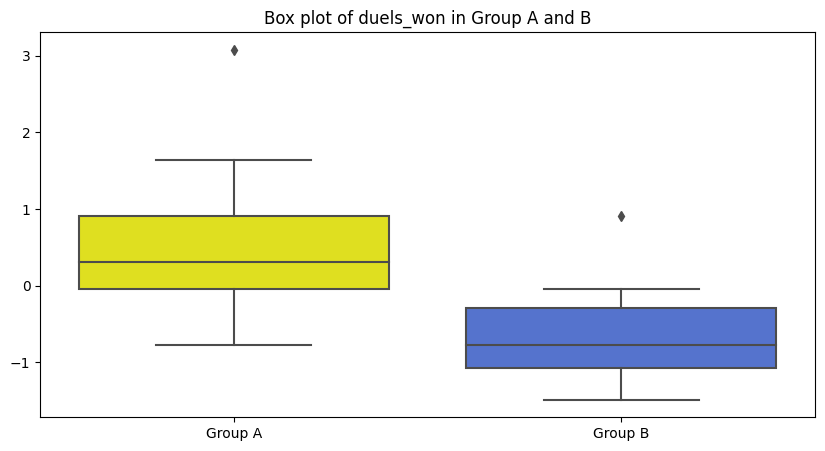

Feature: interceptions
T-statistic: 2.119140524041356
P-value: 0.044618702382786625




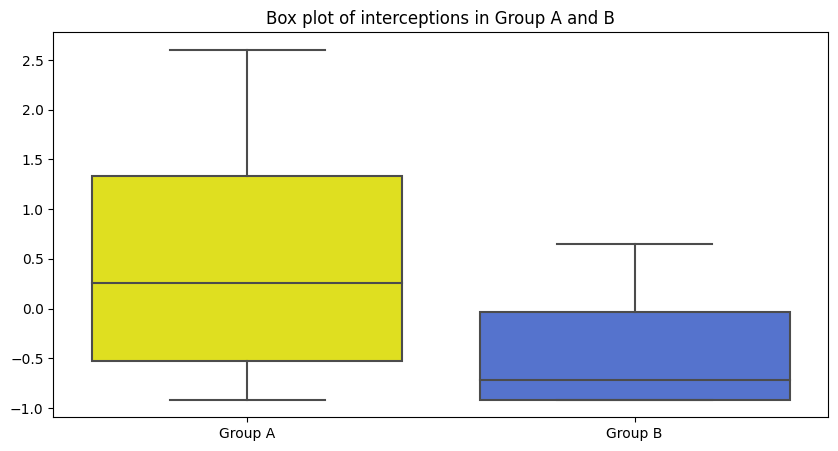



ANOVA Results
F-statistic: 0.11088949395422616
P-value: 0.9533617822267736


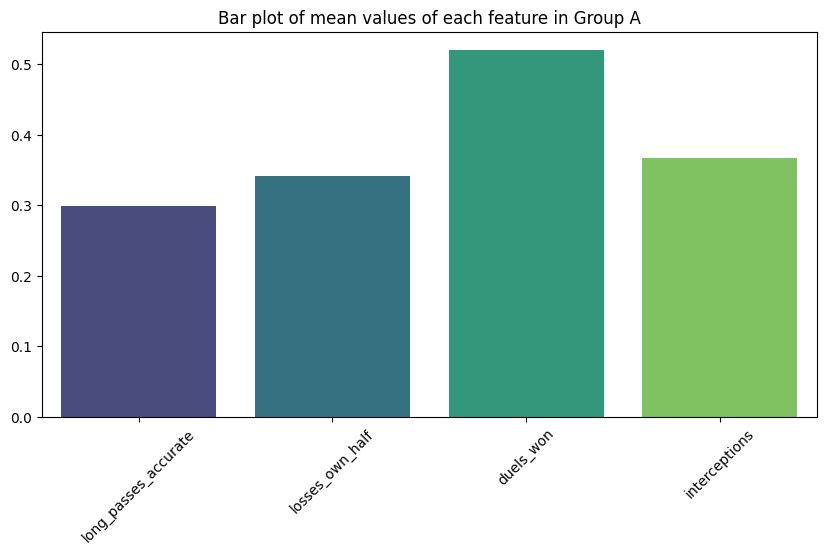

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['long_passes_accurate', 'losses_own_half', 'duels_won', 'interceptions']

# Identify the median of 'aerial_duels_won' to divide the data
median_aerial_duels = normalized_df['aerial_duels_won'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['aerial_duels_won'] >= median_aerial_duels]
group_B = normalized_df[normalized_df['aerial_duels_won'] < median_aerial_duels]

# Conduct t-tests (A/B tests) for each variable with 'aerial_duels_won'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'aerial_duels_won'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$

### Ordinary Least Square - Total Actions

                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.998
Model:                                  OLS   Adj. R-squared:                  0.997
Method:                       Least Squares   F-statistic:                     1096.
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):           2.38e-22
Time:                              17:16:50   Log-Likelihood:                 41.852
No. Observations:                        26   AIC:                            -67.70
Df Residuals:                            18   BIC:                            -57.64
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

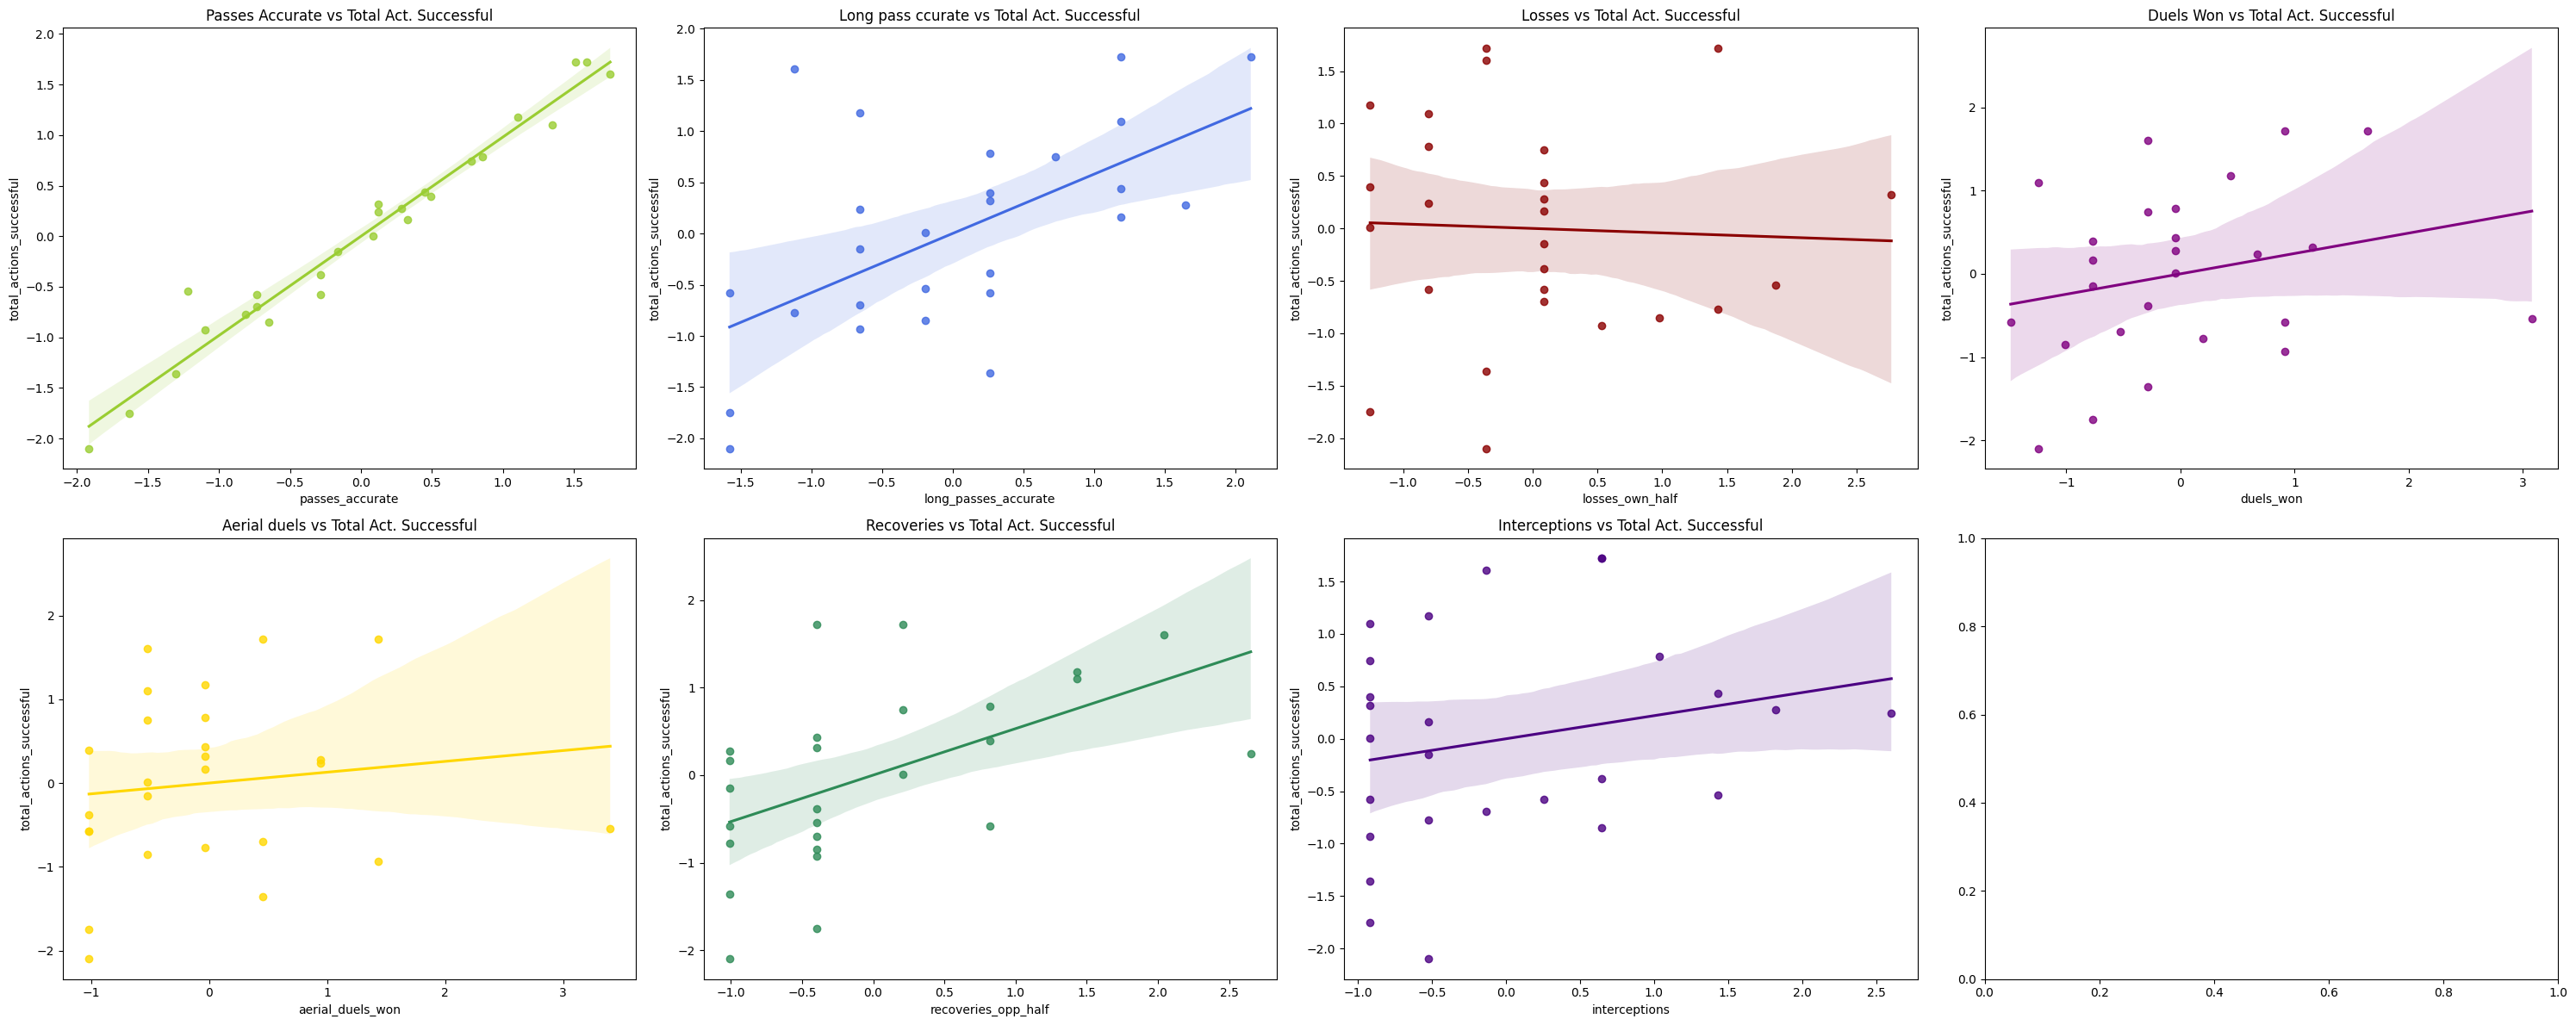

In [ ]:
import statsmodels.api as sm

# Defining the independent variables based on their correlation with 'total_actions_successful'
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'losses_own_half', 
                   'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 0], color='yellowgreen')
axs[0, 0].set_title('Passes Accurate vs Total Act. Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Long pass ccurate vs Total Act. Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Losses vs Total Act. Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[0, 3], color='purple')
axs[0, 3].set_title('Duels Won vs Total Act. Successful')

sns.regplot(x='aerial_duels_won', y='total_actions_successful', data=normalized_df, ax=axs[1, 0], color='gold')
axs[1, 0].set_title('Aerial duels vs Total Act. Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[1, 1], color='seagreen')
axs[1, 1].set_title('Recoveries vs Total Act. Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, ax=axs[1, 2], color='indigo')
axs[1, 2].set_title('Interceptions vs Total Act. Successful')

plt.tight_layout()
plt.show()

This Ordinary Least Squares (OLS) regression analysis is aimed at understanding how various factors or features (independent variables) such as passes accurate, long passes accurate, losses own half, etc., predict the successful total actions (dependent variable). 

The coefficients for each feature signify the expected change in the total_actions_successful for a one-unit change in that feature, assuming all other features remain constant. The standard error for each coefficient measures the level of uncertainty around the estimate of the coefficient. The t-value is a ratio of the estimated coefficient over its standard error, and the p-value is the probability that the coefficient equals zero purely by chance. A low p-value typically less than 0.05 suggests that the feature has a statistically significant contribution to the model. 

The R-squared value is a measure of how well the model fits the data. An R-squared of 0.998 means that the model explains 99.8% of the variability in total actions successful using the features. 

Passes Accurate: This feature has a very high coefficient (0.9772), and a very low p-value, indicating that it is statistically significant. This means that the accuracy of passes plays a crucial role in determining the successful total actions performed by Rüdiger.

Long Passes Accurate: Despite having a low coefficient, the high p-value indicates this feature is not statistically significant in predicting Rüdiger's successful total actions. It means that Rüdiger's performance is less influenced by the accuracy of long passes. 

Losses Own Half: The coefficient for this feature is also quite small and the p-value is high, suggesting that the number of losses in own half doesn't significantly affect Rüdiger's total successful actions.

Duels Won: With a medium-sized coefficient (0.1640) and a low p-value, this feature is statistically significant. This indicates that the number of duels won by Rüdiger contributes meaningfully to his successful total actions.

Aerial Duels Won: This feature has a small coefficient and a slightly high p-value, implying that the number of aerial duels won by Rüdiger doesn't significantly impact his total successful actions.

Recoveries Opp Half: This feature has a very small coefficient and a high p-value, indicating that it doesn't significantly affect Rüdiger's successful actions.

Interceptions: The coefficient is small, and the p-value is high, suggesting that interceptions don't play a significant role in Rüdiger's successful actions.

From the football perspective, this model suggests that Rüdiger's performance in matches is most significantly influenced by his pass accuracy and ability to win duels, while long passes, losses in his own half, aerial duels, recoveries in the opponent's half, and interceptions don't significantly contribute to his total successful actions. It's clear that Rüdiger's strength lies in his precise passing and ground duels, while other aspects of his play don't significantly impact his overall performance.

### Based on Duels Won

                            OLS Regression Results                            
Dep. Variable:              duels_won   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     11.13
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.13e-05
Time:                        17:16:51   Log-Likelihood:                -19.597
No. Observations:                  26   AIC:                             51.19
Df Residuals:                      20   BIC:                             58.74
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.939e-17 

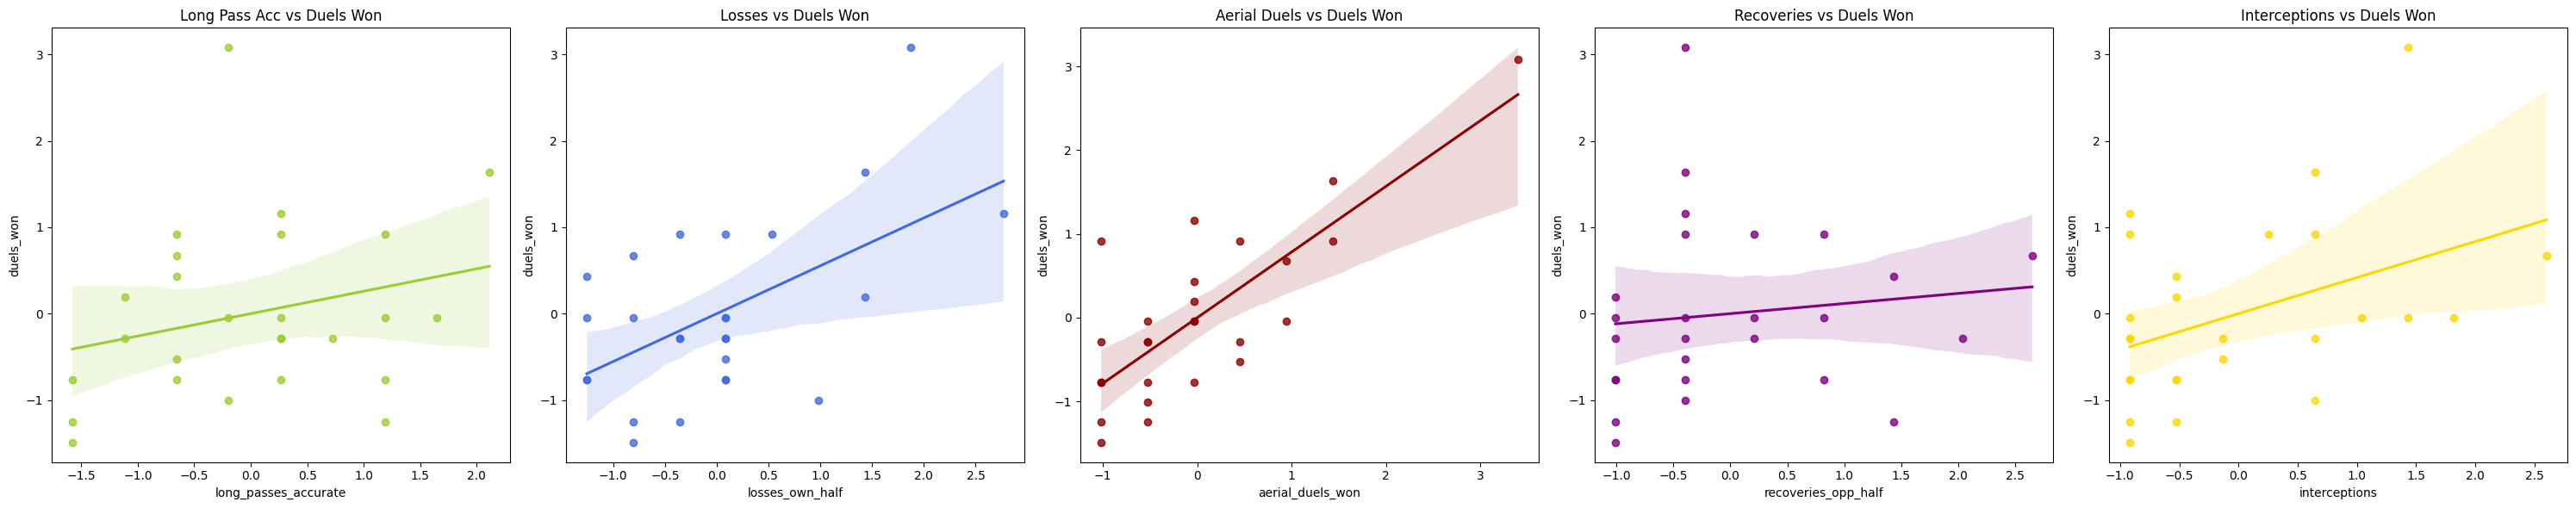

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['long_passes_accurate', 'losses_own_half', 
                   'aerial_duels_won', 'recoveries_opp_half', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['duels_won']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Long Pass Acc vs Duels Won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Losses vs Duels Won')

sns.regplot(x='aerial_duels_won', y='duels_won', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Aerial Duels vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Recoveries vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Interceptions vs Duels Won')

plt.tight_layout()
plt.show()

### Based on Aerials Duels Won

                             OLS Regression Results                            
Dep. Variable:     recoveries_opp_half   R-squared:                       0.642
Model:                             OLS   Adj. R-squared:                  0.502
Method:                  Least Squares   F-statistic:                     4.602
Date:                 Thu, 24 Aug 2023   Prob (F-statistic):            0.00420
Time:                         17:16:54   Log-Likelihood:                -23.555
No. Observations:                   26   AIC:                             63.11
Df Residuals:                       18   BIC:                             73.17
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

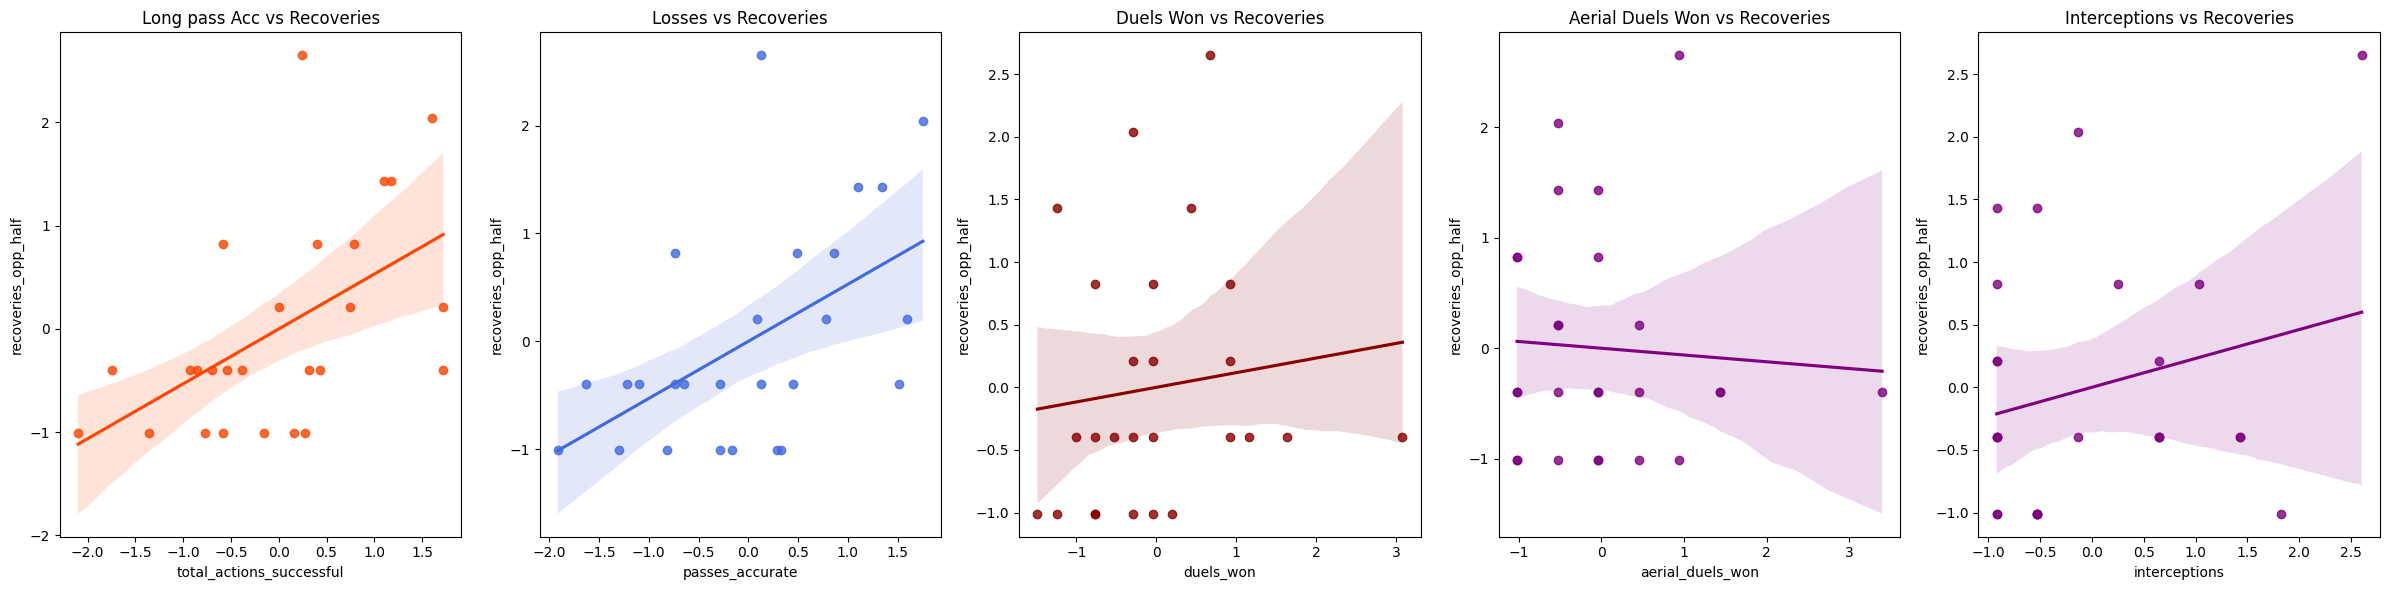

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['recoveries_opp_half']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(24, 6))

sns.regplot(x='total_actions_successful', y='recoveries_opp_half', data=normalized_df, ax=axs[0], color='orangered')
axs[0].set_title('Long pass Acc vs Recoveries')

sns.regplot(x='passes_accurate', y='recoveries_opp_half', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Losses vs Recoveries')

sns.regplot(x='duels_won', y='recoveries_opp_half', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Duels Won vs Recoveries')

sns.regplot(x='aerial_duels_won', y='recoveries_opp_half', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Aerial Duels Won vs Recoveries')

sns.regplot(x='interceptions', y='recoveries_opp_half', data=normalized_df, ax=axs[4], color='purple')
axs[4].set_title('Interceptions vs Recoveries')

plt.tight_layout()
plt.show()

## Linear Regression with Sci-Kit Learn

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.9937490763162888
Coefficients:
passes_accurate: 1.0093967306978402
long_passes_accurate: -0.044942563797494534
losses_own_half: -0.006111629291207105
duels_won: 0.1592709976277903
aerial_duels_won: 0.04051977839773529
recoveries_opp_half: -0.04177062480311547
interceptions: 0.008731138717888194
Mean squared error: 0.01
Coefficient of determination: 0.99


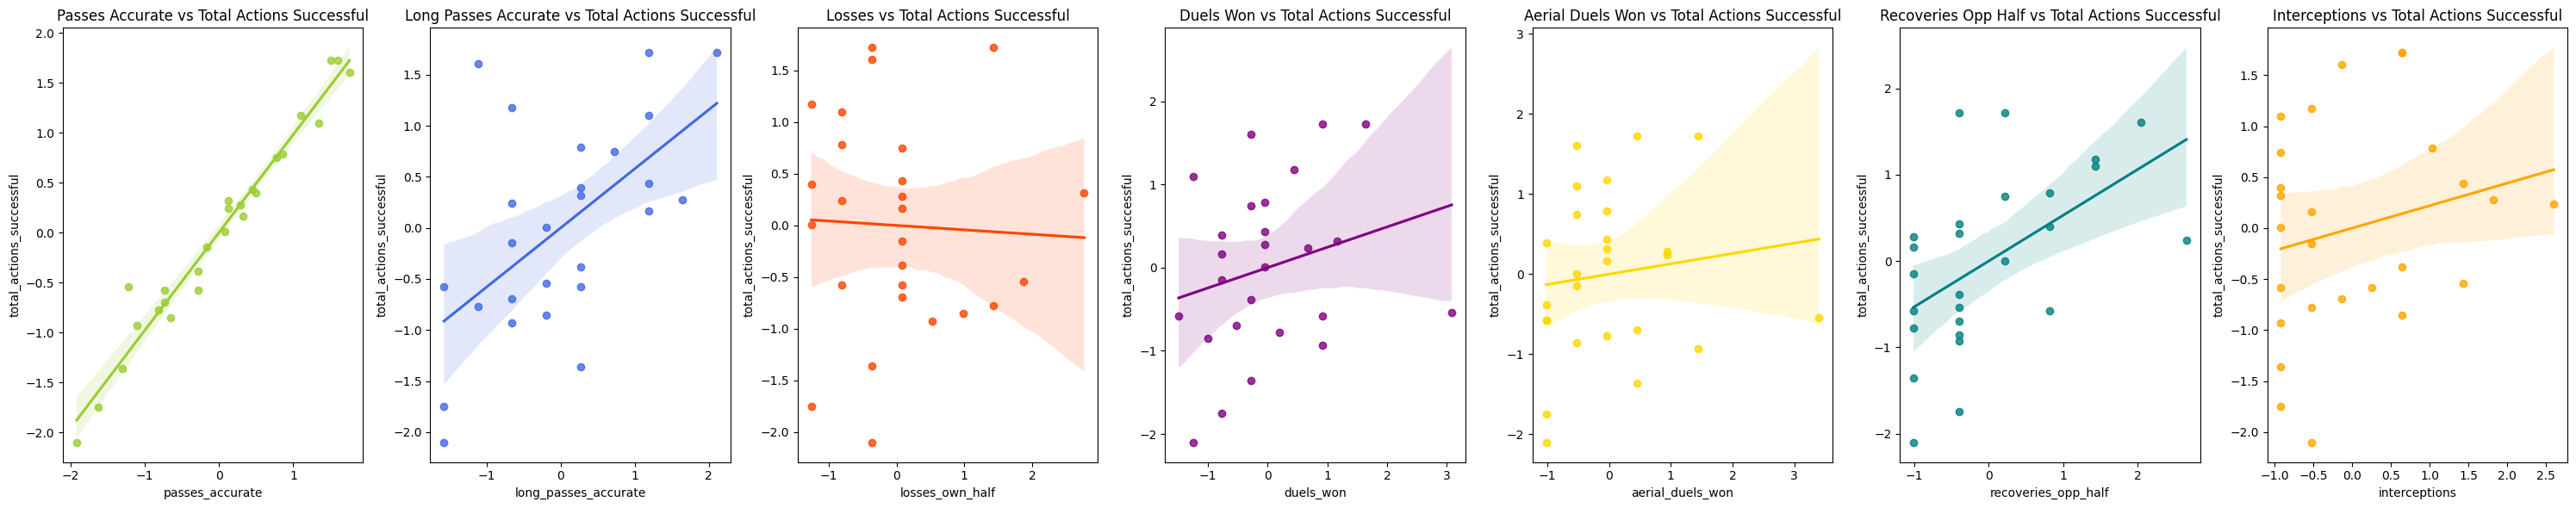

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['passes_accurate', 'long_passes_accurate', 'losses_own_half','duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, figsize=(30, 6))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='orangered', ax=axs[2])
axs[2].set_title('Losses vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='aerial_duels_won', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Aerial Duels Won vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='teal', ax=axs[5])
axs[5].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='orange', ax=axs[6])
axs[6].set_title('Interceptions vs Total Actions Successful')

plt.tight_layout()
plt.show()

The coefficients indicate how much the successful total actions will change for each unit increase in the respective feature while keeping other features constant. For instance, for every unit increase in accurate passes, the total actions successful is expected to increase by approximately 1.009, assuming all other variables remain constant. 

The mean squared error (MSE) is a measure of the model's accuracy. An MSE of 0.01 indicates that, on average, the model's predictions are 0.01 units away from the actual values. This is quite low, suggesting that the model is fairly accurate. 

The coefficient of determination, also known as R-squared, measures the proportion of the variance in the dependent variable that can be predicted from the independent variables. An R-squared of 0.99 indicates that 99% of the changes in successful total actions can be explained by the model, a very high value indicating a good model fit. 

Accurate Passes: The coefficient is 1.009, suggesting that Rüdiger's accurate passes have a significant positive impact on his successful actions on the field. Each increase in accurate pass is expected to result in a corresponding increase in successful actions.

Long Passes Accurate: The coefficient is -0.045, indicating a negative relationship. It means that more accurate long passes do not necessarily contribute to more successful actions. This can be interpreted that Rüdiger may focus less on long passes during the game.

Losses in Own Half: The coefficient is -0.006, implying a negligible impact on his successful actions. Therefore, minimizing losses in his own half may not significantly improve Rüdiger's performance.

Duels Won: With a coefficient of 0.159, winning duels has a positive influence on Rüdiger's successful actions. Hence, his strong duel-winning ability is crucial for his performance.

Aerial Duels Won: The coefficient is 0.041, suggesting that winning aerial duels moderately contributes to Rüdiger's success on the field. It's an area where improvements could potentially enhance his performance.

Recoveries in Opponent's Half: The coefficient is -0.042, indicating a negative relationship. This suggests that more recoveries in the opponent's half do not necessarily lead to more successful actions. 

Interceptions: The coefficient is 0.009, suggesting a slight positive relationship. This indicates that interceptions have a minimal impact on Rüdiger's successful actions.

From a football perspective, the model indicates that Rüdiger's performance is most significantly influenced by accurate passes and duels won. Areas like long passes, losses in own half, recoveries in opponent's half, and interceptions don't contribute much to his successful actions. Aerial duels, though not as impactful as some other areas, can still positively affect his performance.

### Based on Duels Won

Mean r^2 over all K-Fold folds: 0.7515422660378774
Coefficients:
total_actions_successful: 3.482132630982256
passes_accurate: -3.274470475052131
long_passes_accurate: 0.06363236965513669
losses_own_half: 0.07086005583276422
aerial_duels_won: 0.24124743188666015
Mean squared error: 0.18
Coefficient of determination: 0.67


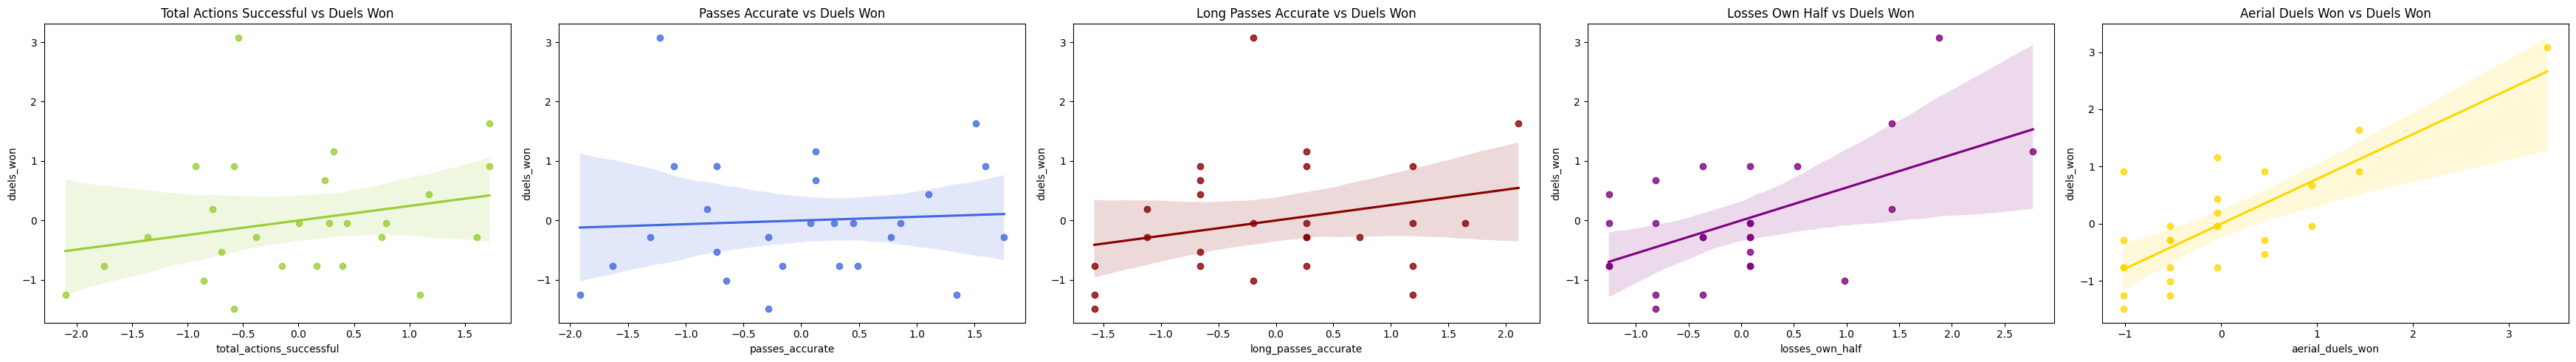

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'losses_own_half', 'aerial_duels_won']]
y = normalized_df['duels_won']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'losses_own_half', 'aerial_duels_won']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(35, 5))

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Duels Won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Passes Accurate vs Duels Won')

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Long Passes Accurate vs Duels Won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Losses Own Half vs Duels Won')

sns.regplot(x='aerial_duels_won', y='duels_won', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Aerial Duels Won vs Duels Won')

plt.tight_layout()
plt.show()

Total Actions Successful (3.48): From a data scientist's view, the substantial positive coefficient signifies that Rüdiger's total successful actions have a strong positive impact on the duels won. On football optics, this demonstrates his competence in diverse roles, such as interceptions, tackles, and clearances, reinforcing his image as a versatile and effective defender.

Passes Accurate (-3.27): Statistically, the negative value here indicates an inverse relationship between accurate passes and duels won. On football optics, this might reflect Rüdiger's playing style where winning duels might lead to quicker and less precise distribution, focusing on regaining possession rather than maintaining it through careful passing.

Long Passes Accurate (0.063): The positive but small coefficient from a data scientist's standpoint reveals that accurate long passes have a slight positive effect on duels won. On football optics, this could underline Rüdiger's ability to link play from the back with longer passes, although it's not a defining characteristic of his dueling ability.

Losses in Own Half (0.07): Statistically, the positive value here suggests that losses in his own half have a minor positive impact on the duels won. On football optics, it might indicate a more aggressive style that occasionally leads to losses but may also contribute to winning more challenges.

Aerial Duels Won (0.24): From a data perspective, this positive coefficient highlights the direct relation between aerial duels won and overall duels won. On football optics, it showcases Rüdiger's aerial dominance and physicality, integral to his overall performance in winning battles against opponents.

Overall, the model for Antonio Rüdiger yields a mean r^2 value of 0.75, a coefficient of determination of 0.67, and a mean squared error of 0.18. 

In summary, this analysis portrays Rüdiger as a defender with a distinctive combination of skills. The coefficients reveal his emphasis on physicality and successful actions over intricate passing, underlining his role as a dominant and assertive defender. The negative coefficient for accurate passes adds a layer of complexity, suggesting a more aggressive and direct style of play. The insights provide a nuanced understanding of Rüdiger's performance, encapsulating his role as a formidable presence in the defense line and his ability to win individual battles through a blend of physical dominance, intelligence, and determination. It's a portrait of a modern defender who can both disrupt the opponent's play and contribute to building attacks from the back, making him a valuable asset to his team.

### Based on Recoveries 

Mean r^2 over all K-Fold folds: -0.91960301107795
Coefficients:
total_actions_successful: -1.5122229957834077
passes_accurate: 1.9105422141637467
losses_own_half: -0.49885564338230637
duels_won: 0.44894283037500954
aerial_duels_won: 0.12177412628856088
Mean squared error: 0.66
Coefficient of determination: 0.18


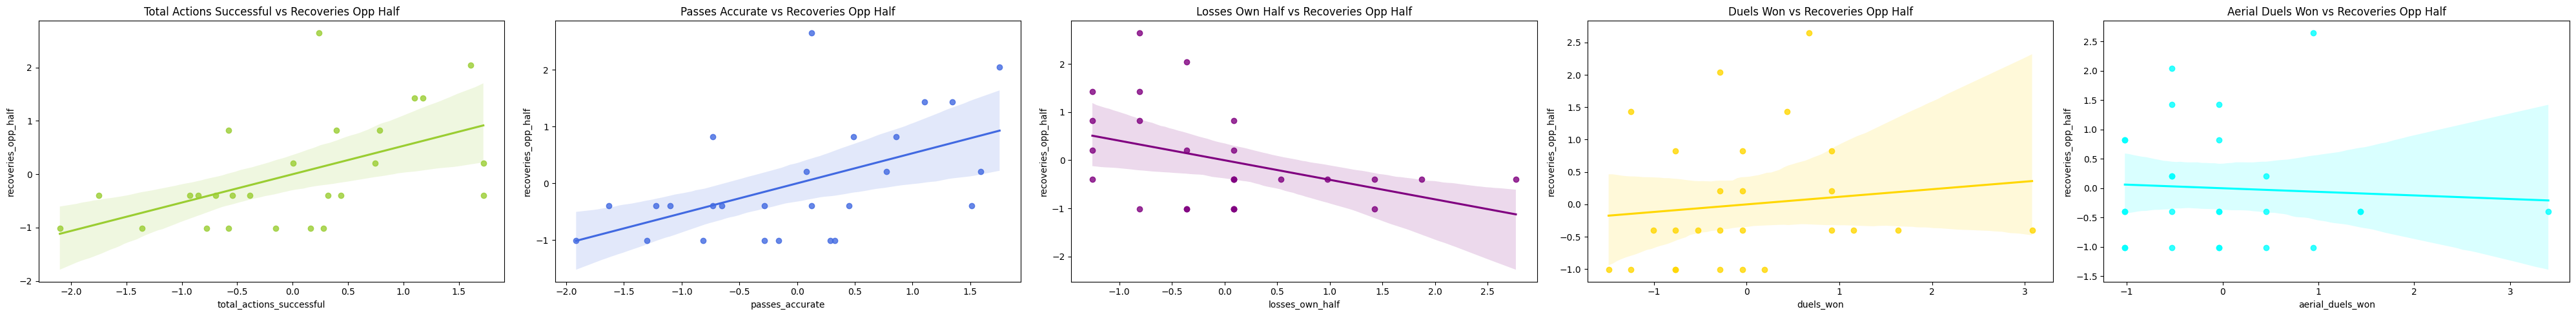

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won']]
y = normalized_df['recoveries_opp_half']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(40, 5))

sns.regplot(x='total_actions_successful', y='recoveries_opp_half', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Recoveries Opp Half')

sns.regplot(x='passes_accurate', y='recoveries_opp_half', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Passes Accurate vs Recoveries Opp Half')

sns.regplot(x='losses_own_half', y='recoveries_opp_half', data=normalized_df, color='purple', ax=axs[2])
axs[2].set_title('Losses Own Half vs Recoveries Opp Half')

sns.regplot(x='duels_won', y='recoveries_opp_half', data=normalized_df, color='gold', ax=axs[3])
axs[3].set_title('Duels Won vs Recoveries Opp Half')

sns.regplot(x='aerial_duels_won', y='recoveries_opp_half', data=normalized_df, color='cyan', ax=axs[4])
axs[4].set_title('Aerial Duels Won vs Recoveries Opp Half')

plt.tight_layout()
plt.show()

Total Actions Successful (-1.51): From a data scientist's perspective, the strong negative coefficient suggests that as Rüdiger's successful actions increase, his recoveries tend to decrease. On football optics, this may imply that when he's actively involved in other successful defensive actions, he may not necessarily be the one recovering the ball, but rather setting it up for teammates to do so.

Passes Accurate (1.91): The positive coefficient statistically denotes that more accurate passes are associated with increased recoveries. On football optics, this could reflect Rüdiger's role in regaining possession and maintaining it through precise distribution, emphasizing his skill in transitioning from defense to offense.

Losses in Own Half (-0.49): Statistically, the negative value suggests that as Rüdiger loses the ball in his own half, his recoveries tend to reduce. On football optics, this might highlight the importance of maintaining possession in defense, as ball losses can lead to situations where recoveries are less feasible.

Duels Won (0.44): From a data standpoint, a positive coefficient indicates a direct relationship between winning duels and recoveries. On football optics, Rüdiger's ability to win duels, both ground and aerial, plays a part in regaining possession for his team, cementing his role as a combative presence in the defense.

Aerial Duels Won (0.12): Statistically, the positive but relatively smaller coefficient reveals that winning aerial duels does contribute to recoveries, though not as significantly as other factors. On football optics, this showcases a facet of Rüdiger's game where aerial dominance aids in ball recoveries, but it's only one of many tools in his defensive arsenal.

Overall, the model has a mean r^2 value of -0.91, which suggests that the model isn't well-suited to predict recoveries based on the provided features. A negative r^2 value can happen when a model is a poor fit for the data. The coefficient of determination is 0.18, which is also on the lower side, indicating that the model might not capture the full complexity of the recovery aspect of Rüdiger's game.

In summary, while individual features provide insights into Rüdiger's playing style and approach to recoveries, the overall model suggests there's more complexity to this aspect of his game than the features can capture. Rüdiger’s role in recoveries might be influenced by various tactical or situational factors beyond these variables, emphasizing the multifaceted nature of football and the importance of comprehensive analysis in player evaluation.

## XGBoost & Cross-Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.

### Based on Total Actions

Mean squared error: 0.06
Coefficient of determination: 0.92
Cross-Validation Mean Score: 0.49


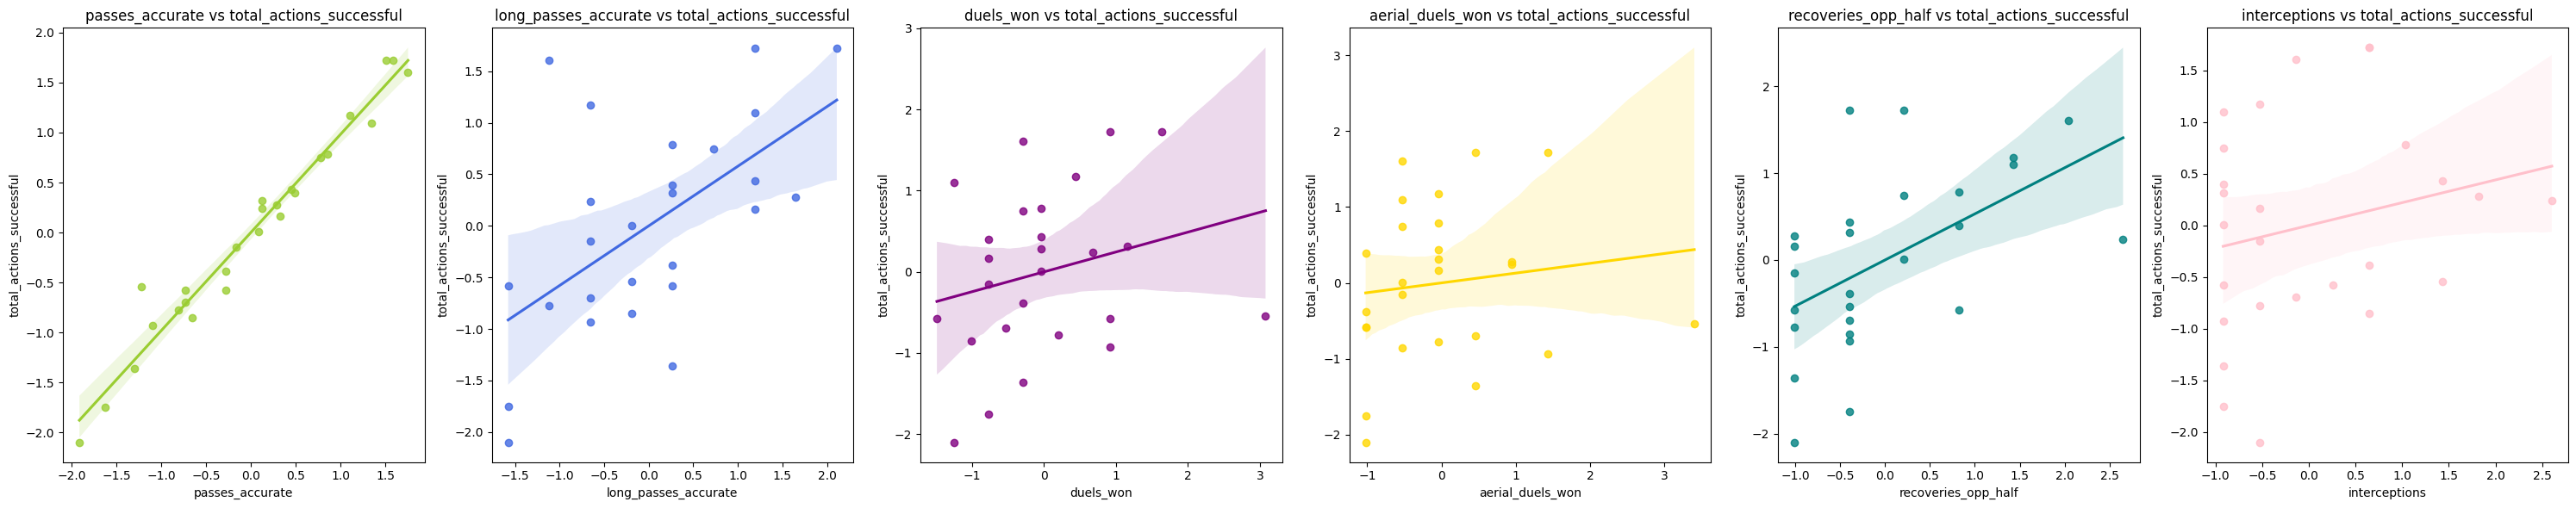

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate',  'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create XGBoost regression object
model = XGBRegressor()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate and display the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)

# Calculate and display the coefficient of determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: %.2f' % r2)

# Perform 5-fold cross validation and display mean score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Mean Score: %.2f' % scores.mean())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 6))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('passes_accurate vs total_actions_successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('long_passes_accurate vs total_actions_successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[2])
axs[2].set_title('duels_won vs total_actions_successful')

sns.regplot(x='aerial_duels_won', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[3])
axs[3].set_title('aerial_duels_won vs total_actions_successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='teal', ax=axs[4])
axs[4].set_title('recoveries_opp_half vs total_actions_successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='pink', ax=axs[5])
axs[5].set_title('interceptions vs total_actions_successful')

plt.tight_layout()
plt.show()

The mean squared error (MSE) of this model is 0.06, which is somewhat larger than the linear regression model. This could indicate that the XGBoost model predictions are on average 0.06 units away from the actual values. While this value is slightly higher than the linear regression model's MSE, it is still relatively small, indicating a generally accurate model.

The coefficient of determination or R-squared value is 0.92. This suggests that 92% of the variance in Antonio Rüdiger's successful actions can be explained by the features in this model. Although this is lower than the R-squared from the linear regression model, 92% is still quite high, implying that this model provides a good fit to the data.

The cross-validation mean score is a measure of how well the model is expected to perform in general, given different training and test data. The score is 0.50, indicating that the model might not generalize as well to new data compared to its performance on the current data set. 

On football optics, the model indicates that Rüdiger's performance can be predicted with a reasonable degree of accuracy based on these specific on-field metrics. However, there's a slight increase in error compared to the linear regression model, which suggests that the XGBoost model may be overfitting to the specific nuances of this data set. 

The cross-validation score also highlights that while this model is reasonably accurate with this specific dataset, its predictions might not be as accurate when generalizing to new datasets or different players. This might be due to the uniqueness of Rüdiger's play style and performance, which might not be perfectly captured by these general metrics. 

In sum, while this XGBoost model provides some valuable insights, it's critical to complement these findings with domain knowledge of the player's individual skills, the team's style of play, and specific match situations to fully understand and predict Antonio Rüdiger's performance.

### Based on Duels Won

Mean squared error: 0.55
Coefficient of determination: -0.01
Cross-Validation Mean Score: -1.04


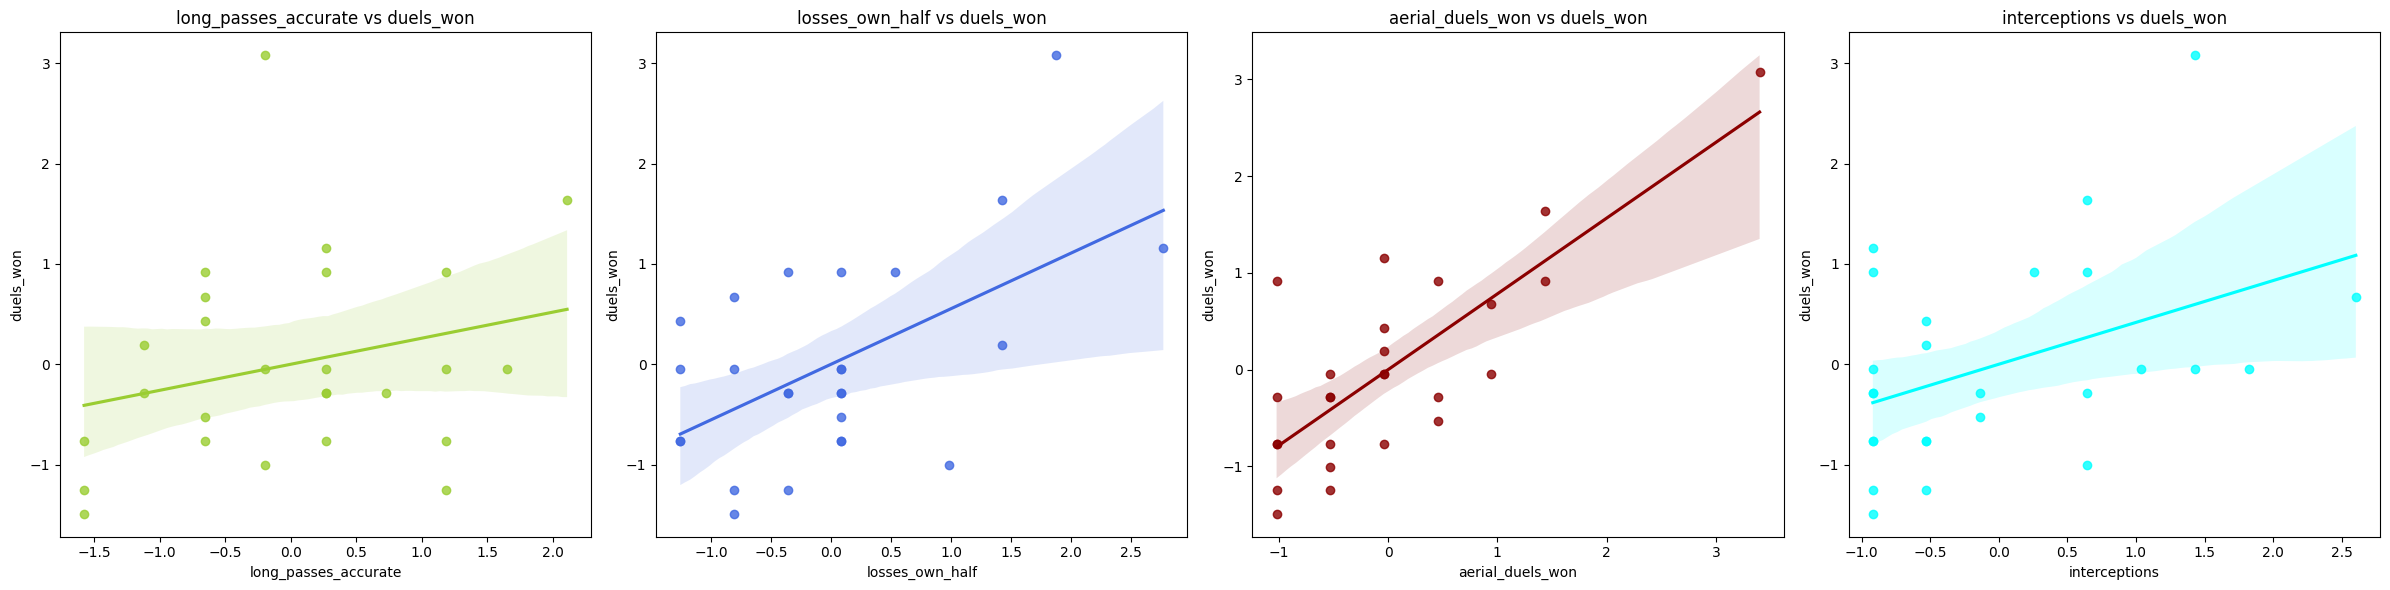

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'aerial_duels_won', 'interceptions']]
y = normalized_df['duels_won']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create XGBoost regression object
model = XGBRegressor()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate and display the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)

# Calculate and display the coefficient of determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: %.2f' % r2)

# Perform 5-fold cross validation and display mean score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Mean Score: %.2f' % scores.mean())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('long_passes_accurate vs duels_won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('losses_own_half vs duels_won')

sns.regplot(x='aerial_duels_won', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('aerial_duels_won vs duels_won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, color='cyan', ax=axs[3])
axs[3].set_title('interceptions vs duels_won')

plt.tight_layout()
plt.show()

Mean Squared Error (MSE) (0.55): could be considered moderate or high depending on the scale of the dependent variable. A higher MSE suggests that the predictions from the model may deviate significantly from the actual values, indicating potential issues in the model's performance or the inherent unpredictability of the target variable.On football optics, this error might suggest that predicting the number of duels Rüdiger wins in any given match or timeframe is challenging. The nature of duels is influenced by a myriad of factors, including opponent tactics, physical confrontations, or game scenarios, which might lead to significant variances in outcomes.

Coefficient of Determination (R^2) (-0.01):indicates a poor model fit. Essentially, the model does not explain the variance in the dependent variable any better than a simple mean. The negative value could arise if the model performs worse than a naive model that just predicts the mean for all observations. On football optics, This suggests that the model struggles to accurately capture the factors influencing Rüdiger's performance in duels. Footballing duels are multifaceted, encompassing physical battles, aerial contests, and one-on-one confrontations. The variability in these challenges across different games might not be easily quantifiable or predictable.

Cross-Validation Mean Score (-1.04): is concerning. It indicates that the model's predictions, when tested on unseen data, perform worse than a simplistic baseline model. This could suggest overfitting, inappropriate model parameters, or a lack of relevant features. On football optics, Such a score can emphasize the unpredictable nature of duels in football. It might also point towards Rüdiger's performance being influenced by factors not considered in the model, such as specific opponent strategies, game momentum, or even individual decisions made during high-pressure moments.

In summary, the XGBoost Regressor Model based on "duels won" for Antonio Rüdiger reveals several concerns. From a data science perspective, the model's negative R^2 and cross-validation scores suggest it lacks predictive power for this specific metric. In football terms, it underscores the complexity and dynamic nature of duels. Predicting them requires a deeper understanding and perhaps more granular data or sophisticated modeling techniques to account for the various influencing factors.

### Based on Recoveries

Mean squared error: 0.47
Coefficient of determination: 0.43
Cross-Validation Mean Score: -1.27


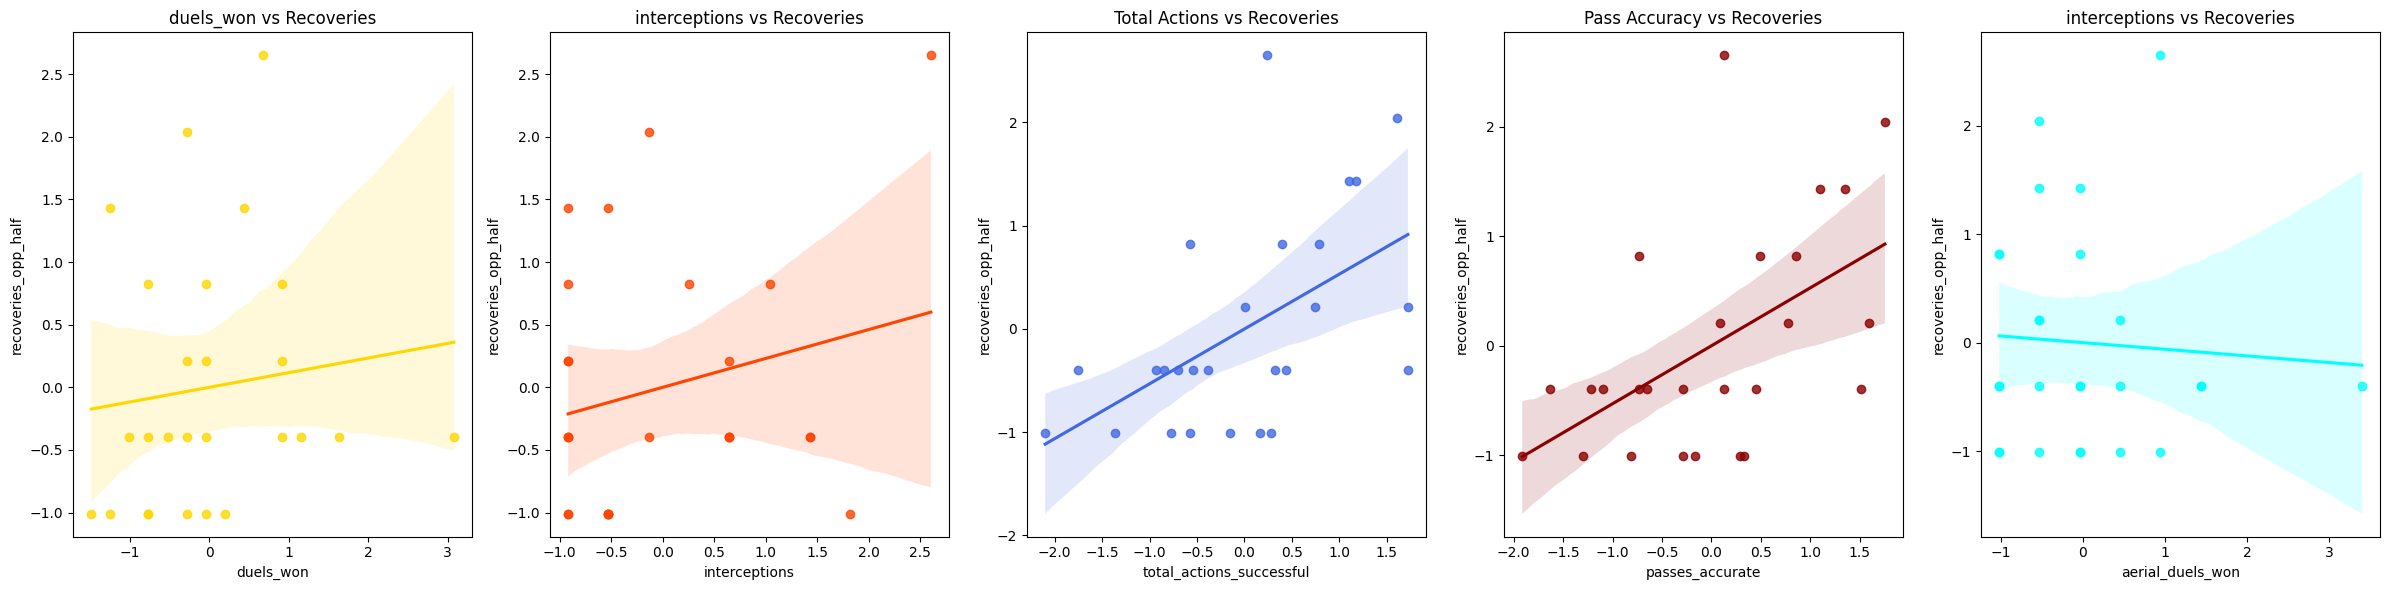

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'passes_accurate', 'duels_won', 'aerial_duels_won', 'interceptions']]
y = normalized_df['recoveries_opp_half']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create XGBoost regression object
model = XGBRegressor()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate and display the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)

# Calculate and display the coefficient of determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: %.2f' % r2)

# Perform 5-fold cross validation and display mean score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Mean Score: %.2f' % scores.mean())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(24, 6))

sns.regplot(x='duels_won', y='recoveries_opp_half', data=normalized_df, color='gold', ax=axs[0])
axs[0].set_title('duels_won vs Recoveries')

sns.regplot(x='interceptions', y='recoveries_opp_half', data=normalized_df, color='orangered', ax=axs[1])
axs[1].set_title('interceptions vs Recoveries')

sns.regplot(x='total_actions_successful', y='recoveries_opp_half', data=normalized_df, color='royalblue', ax=axs[2])
axs[2].set_title('Total Actions vs Recoveries')

sns.regplot(x='passes_accurate', y='recoveries_opp_half', data=normalized_df, color='darkred', ax=axs[3])
axs[3].set_title('Pass Accuracy vs Recoveries')

sns.regplot(x='aerial_duels_won', y='recoveries_opp_half', data=normalized_df, color='cyan', ax=axs[4])
axs[4].set_title('interceptions vs Recoveries')

plt.tight_layout()
plt.show()

Mean Squared Error (MSE) (0.47): could indicate a moderate prediction error. This metric would suggest that there's a difference between the predicted number of recoveries and the actual number, implying the model isn't capturing all relevant patterns. On football optics, This might hint at the complex nature of recoveries in a match. Rüdiger's recoveries could vary based on the flow of the game, the positioning of his teammates, or the tactics of the opposition. An error in predicting this shows the intricate dynamics of the game that might be tough to capture.

Coefficient of Determination (R^2) (0.43): means the model explains about 43% of the variance in Rüdiger's recoveries. This indicates that while there's some relationship between the features and the target variable, more than half of the variability remains unexplained. On football optics, this percentage reflects that while we can gauge some of Rüdiger's actions that lead to recoveries, a significant part of his performance in this aspect is influenced by factors not considered in the model. This could be the fluidity of the game, the strategies employed, or perhaps individual instinctive decisions.

Cross-Validation Mean Score (-1.27): is quite troubling. It implies that the model's performance on unseen data is significantly worse than a simple constant baseline. Such a value can arise from overfitting or a lack of meaningful features that generalize well. On football optics, This score accentuates the unpredictable nature of football recoveries and perhaps Rüdiger's adaptability in various game situations. While some matches might see him consistently winning the ball back, others could pose challenges that aren't easily quantifiable, leading to the model's poor generalization.

To sum up, the XGBoost Regressor Model based on "Recoveries" for Antonio Rüdiger presents a mixed picture. The model does capture some variance in his performance, but the negative cross-validation score shows severe limitations in its predictive ability. From a football perspective, it highlights the multifaceted nature of recoveries and the myriad factors influencing a defender's ability to regain possession during a match. Improving this model might necessitate a more detailed feature set, richer data, or enhanced domain knowledge about the game's dynamics.

## Conformal Predictions

### Conformal Prediction provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 85.86%
Average prediction interval width: 0.29


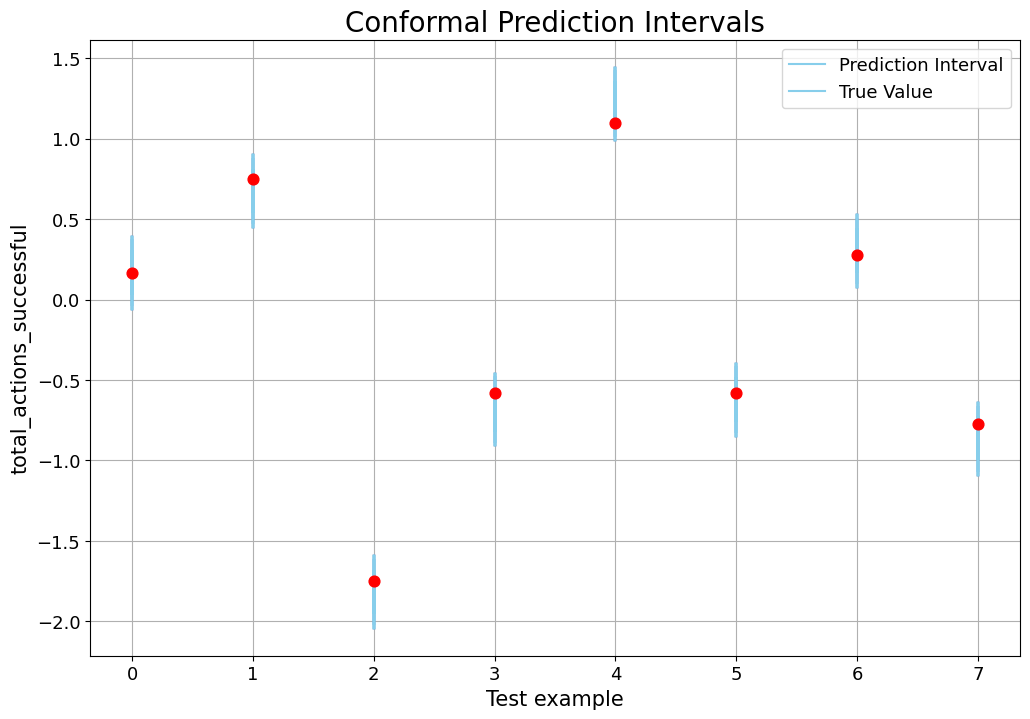

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)
plt.show()

Prediction interval coverage (85.86%): is commendable. This high coverage suggests that the model is proficiently capturing the dynamics of Rüdiger's successful actions on the pitch. Achieving close to 86% coverage means that the predicted intervals are correctly including the true outcomes around 86% of the time. The features and model design selected appear to provide a robust representation of Rüdiger's performance. Nevertheless, for further improvement, it's worth analyzing the 14% of cases where predictions miss to gain insights into potential outliers or unique scenarios. On football optics, highlights Antonio Rüdiger's consistency on the pitch. It points towards his regular contributions and the effectiveness of his engagements, be it in defense, passing, or other key actions. This high level of successful action is a testament to Rüdiger's skill and reliability, making him an invaluable asset for his team.

Average prediction interval width (0.29): when associated with a high coverage, indicates a strong level of precision in the model's predictions. This narrow interval suggests that the model is confident in its predictions for Rüdiger's successful actions. A slim interval width, while maintaining high coverage, is ideal, indicating that the model can provide precise estimates without sacrificing accuracy. This outcome could be an indicator of a well-chosen set of features, adequate preprocessing, and an appropriate model choice. On football optics, showcases the narrow range within which Rüdiger's performances fluctuate. It underscores his consistent contributions and limited variability in his overall play. Such a narrow variance is emblematic of a player who is consistently performing at a high level, delivering reliable results match after match.

To conclude, the conformal prediction outcomes for Antonio Rüdiger's "Total Actions Successful" paint a picture of a player who consistently performs at a high level. The statistical findings corroborate his standing as a consistent and reliable player on the field. The current modeling approach seems apt in capturing Rüdiger's performance dynamics, although there's always scope for further enhancements and refinements.

### Based on Won

Prediction interval coverage: 69.70%
Average prediction interval width: 1.96


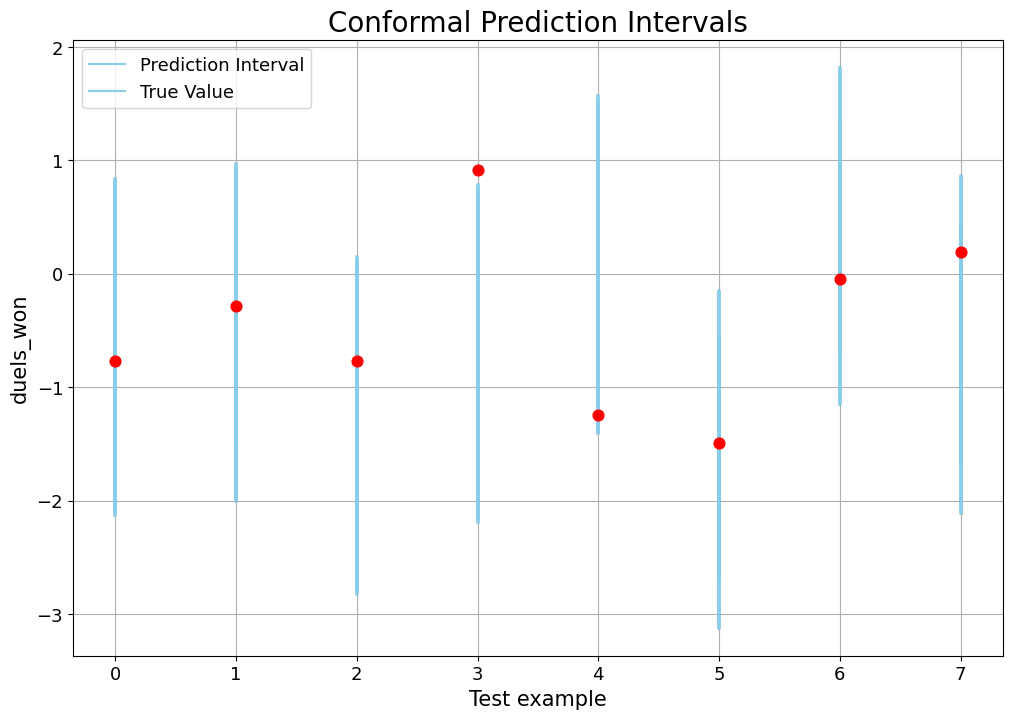

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'aerial_duels_won', 'recoveries_opp_half']]
y = normalized_df['duels_won']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('duels_won', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (69.70%): is moderate. This coverage suggests that the model's predicted intervals are correctly encompassing the actual observed outcomes for Rüdiger's duels nearly 70% of the time. While this is a respectable coverage, it leaves room for improvement. It may be worthwhile to investigate the 30% of instances where the predictions are not within the interval to identify any patterns, outliers, or special scenarios that the model might be missing. On football optics, demonstrates Rüdiger's proficiency in one-on-one encounters, be it on the ground or in the air. This coverage might point towards some variability in his duel outcomes, which could be influenced by the quality of opponents, the type of duels (e.g., aerial vs. ground), or specific game situations. Understanding the contexts in which he's more or less successful can be vital for tactical planning and performance analysis.

Average prediction interval width (1.96): is reasonable, given the context of duels in a football match. This width suggests a balance in the model's predictions, capturing the inherent variability in Rüdiger's performance while also providing a relatively precise range for expected outcomes. It may be interesting to analyze which factors or features are driving the width of this interval, to understand if there's potential to make it narrower without sacrificing the model's accuracy. On football optics, illustrates the range within which Rüdiger's duel outcomes fluctuate. This could mean that depending on the game situation, opponents, or tactical setup, Rüdiger could win a varying number of duels in a given match. However, the interval width still emphasizes his capacity to maintain a relatively consistent level of performance in these encounters.

To summarize, the outcomes related to "Duels Won" for Rüdiger give us insights into his dueling abilities and the model's capability to capture this attribute. The moderate coverage and the defined prediction interval width provide a comprehensive view of Rüdiger's duel-related contributions and performance patterns. Fine-tuning the model further or understanding the on-ground contexts could provide richer insights. 

### Based on Recoveries 

Prediction interval coverage: 92.93%
Average prediction interval width: 3.79


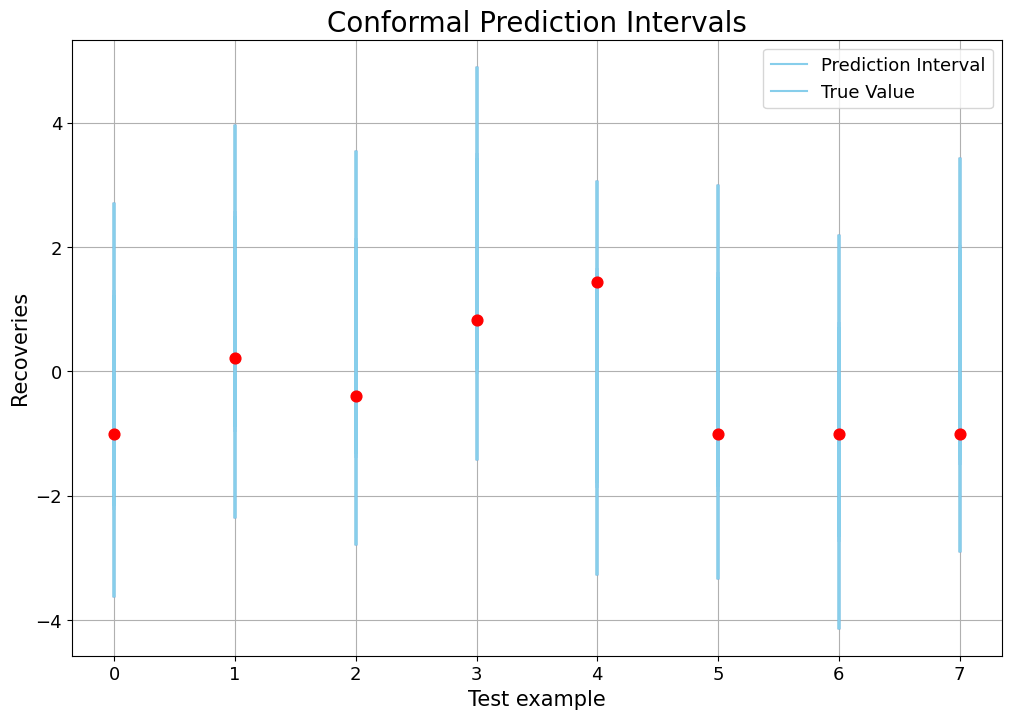

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'passes_accurate', 'duels_won', 'aerial_duels_won', 'interceptions']]
y = normalized_df['recoveries_opp_half']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('Recoveries', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (92.93%): signifies that the model is exceptionally adept at capturing the patterns and trends in Rüdiger's ability to recover the ball. Such high coverage indicates that in approximately 93 out of 100 instances, the true value of recoveries falls within the model's predicted interval. This is an excellent metric, suggesting a robust modeling approach for this specific attribute. However, for continuous improvement, one might investigate the remaining 7% of predictions to discern if there are any unique scenarios or outliers the model may be overlooking. On football optics, strongly underscores Rüdiger's consistency and efficiency in regaining possession for his team. It accentuates his defensive prowess and his ability to read the game, positioning himself effectively to intercept or retrieve loose balls.

Average prediction interval width (3.79): combined with the high coverage rate, suggests a moderate level of precision. While the model is adept at capturing the overall trend, the width indicates a degree of variability in Rüdiger's recovery performance from game to game. It would be worthwhile to explore the reasons behind this variability—whether it's due to tactical decisions, the nature of the opponents, or specific game contexts. A narrower interval width would be ideal, but the balance achieved here, given the high coverage, seems reasonable. On football optics, indicates a range within which Rüdiger's performance fluctuates across matches. This could be interpreted as a variation in the number of opportunities he gets to recover the ball, influenced by game dynamics, team strategy, or the quality of opposition. Nonetheless, the width doesn't overshadow his evident capability to consistently recover the ball, making vital contributions to his team's defensive solidity.

In conclusion, Antonio Rüdiger's conformal prediction outcomes for "Recoveries" paint a picture of a reliable and efficient defender who consistently performs his role in regaining possession. The data points towards both his footballing qualities and the efficacy of the model in predicting this specific attribute.

## Radar Map Visualization 

### Matches Performance

### Chelsea (2022) - A. Rüdiger Performance

- Total Action Success (TAS):(140-104) -> 74 %

- Shots on Target (SOT): (4-1) -> 25

- Pass Accuracy (PA): (101-90) -> 89 %

- Long Passes Accurate (LPA): (9-6) -> 67 %

- Dribbles (DS): (2-1) -> 50 %

- Duels won (DW): (2-1) -> 46 %

- Aerial Duels Won (ADW): (3-3) -> 75 %

- Own Losses (LOH): (3-2) -> 17 %

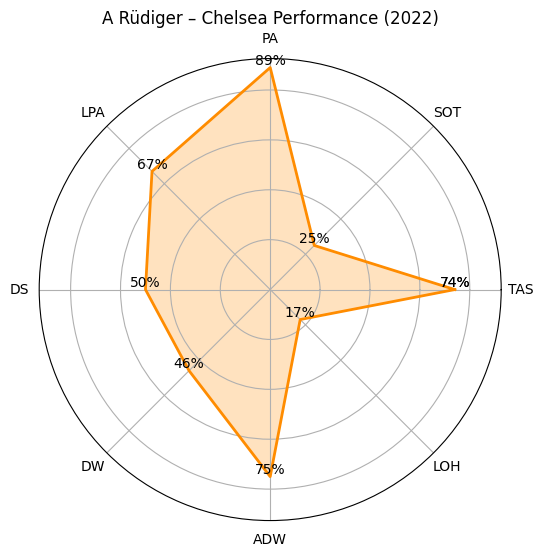

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'LPA', 'DS', 'DW', 'ADW', 'LOH'])
stats = np.array([74, 25, 89, 67, 50, 46, 75, 17])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("A Rüdiger – Chelsea Performance (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='darkorange', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkorange', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liverpool (2023 - 1st Leg) - A. Rüdiger Performance

- Total Action Success (TAS): (60-50) -> 83 %

- Pass Accuracy (PA): (46-44) -> 96 %

- Long Passes Accurate (LPA): (5-4) -> 80 %

- Duels won (DW): (8-6) -> 75 %

- Aerial Duels Won (ADW): (2-0) -> 0 %

- Own Losses (LOH): (4-3) -> 75 %

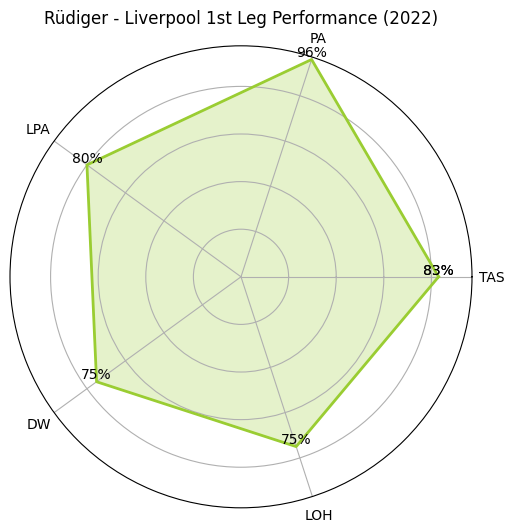

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH'])
stats = np.array([83, 96, 80, 75, 75])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Rüdiger - Liverpool 1st Leg Performance (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liverpool (2023 - 2nd Leg) - A. Rüdiger Performance

- Total Action Success (TAS):(50-38) -> 76 %

- Pass Accuracy (PA): (40-35) -> 88 %

- Long PassesAccurate (LPA): (7-3) -> 43 %

- Duels won (DW): (3-4) -> 75%

- Aerial Duels Won (ADW): (1-1) -> 100 %

- Own Losses (LOH): (6-5) -> 83 %

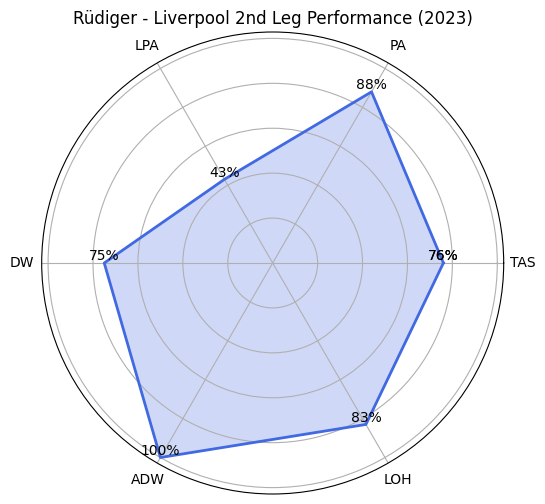

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS','PA', 'LPA', 'DW', 'ADW','LOH'])
stats = np.array([76, 88, 43, 75, 100, 83])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Rüdiger - Liverpool 2nd Leg Performance (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City (2023) - A. Rüdiger Performance

- Total Action Success (TAS):(16-15) -> 94 %

- Pass Accuracy (PA): (11-11) -> 100 %

- Long Passes (LPA): 0%

- Duels won (DW): (5-4) -> 80 %

- Aerial Duels (ADW): (5-4) -> 80 %

- Own Losses (LOH): 0 %

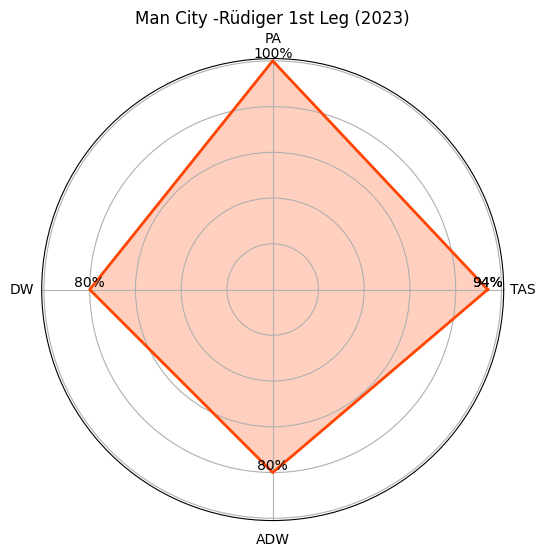

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS','PA', 'DW', 'ADW'])
stats = np.array([94, 100, 80, 80])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Man City -Rüdiger 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b31dd4f5-460f-46af-a8e1-d2d5fa3947fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>